<h2>3. Exploración de Datos (EDA)</h2>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('EmployeeStress.csv')
df.head()

,Age,WeeklyHours,RemoteDays,CommuteTime,JobSatisfaction,SleepHours,PhysicalActivity,TeamSupport,ManagerSupport,HighStress
0,50,53.3,1,34.1,6.3,5.2,31.5,Medium,Medium,No
1,36,39.1,3,51.8,3.7,6.5,57.4,Low,Medium,No
2,29,47.4,3,39.5,6.9,8.1,0.0,Medium,Medium,Yes
3,42,40.0,5,45.3,10.0,5.8,21.4,Low,Low,No
4,40,33.7,1,0.0,6.5,5.7,29.2,Medium,Low,No


<h4>Dimensiones y estructura</h4>

In [2]:
df.shape

(1000, 10)

In [3]:
df.columns


Index(['Age', 'WeeklyHours', 'RemoteDays', 'CommuteTime', 'JobSatisfaction',
       'SleepHours', 'PhysicalActivity', 'TeamSupport', 'ManagerSupport',
       'HighStress'],
      dtype='object')

<h4>Tipos de datos</h4>

In [4]:
df.dtypes


Age                   int64
WeeklyHours         float64
RemoteDays            int64
CommuteTime         float64
JobSatisfaction     float64
SleepHours          float64
PhysicalActivity    float64
TeamSupport          object
ManagerSupport       object
HighStress           object
dtype: object

<h4>Información general del dataset</h4>

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   WeeklyHours       1000 non-null   float64
 2   RemoteDays        1000 non-null   int64  
 3   CommuteTime       1000 non-null   float64
 4   JobSatisfaction   1000 non-null   float64
 5   SleepHours        1000 non-null   float64
 6   PhysicalActivity  1000 non-null   float64
 7   TeamSupport       1000 non-null   object 
 8   ManagerSupport    1000 non-null   object 
 9   HighStress        1000 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 78.3+ KB


<h4>Estadística descriptiva (numéricos)</h4>

In [6]:
df.describe()

,Age,WeeklyHours,RemoteDays,CommuteTime,JobSatisfaction,SleepHours,PhysicalActivity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.947000,42.371700,2.517000,35.467200,5.995800,6.780500,26.651100
std,11.160858,5.113619,1.710742,14.972995,1.950822,0.964188,18.626106
min,22.000000,30.000000,0.000000,0.000000,1.000000,3.100000,0.000000
25%,31.000000,39.000000,1.000000,25.200000,4.700000,6.100000,11.775000
50%,42.000000,42.250000,3.000000,35.700000,6.000000,6.800000,26.150000
75%,50.000000,45.825000,4.000000,45.350000,7.400000,7.400000,40.000000
max,59.000000,57.800000,5.000000,83.900000,10.000000,9.600000,97.000000


<h4>Variables categóricas</h4>

In [7]:
df.describe(include="object")

,TeamSupport,ManagerSupport,HighStress
count,1000,1000,1000
unique,3,3,2
top,Medium,Medium,Yes
freq,504,509,524


<h4>Valores faltantes</h4>

In [8]:
df.isnull().sum()

Age                 0
WeeklyHours         0
RemoteDays          0
CommuteTime         0
JobSatisfaction     0
SleepHours          0
PhysicalActivity    0
TeamSupport         0
ManagerSupport      0
HighStress          0
dtype: int64

In [9]:
df.isnull().mean() * 100

Age                 0.0
WeeklyHours         0.0
RemoteDays          0.0
CommuteTime         0.0
JobSatisfaction     0.0
SleepHours          0.0
PhysicalActivity    0.0
TeamSupport         0.0
ManagerSupport      0.0
HighStress          0.0
dtype: float64

<h4>Detección visual básica (opcional)</h4>

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'WeeklyHours'}>,
        <Axes: title={'center': 'RemoteDays'}>],
       [<Axes: title={'center': 'CommuteTime'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'SleepHours'}>],
       [<Axes: title={'center': 'PhysicalActivity'}>, <Axes: >, <Axes: >]],
      dtype=object)

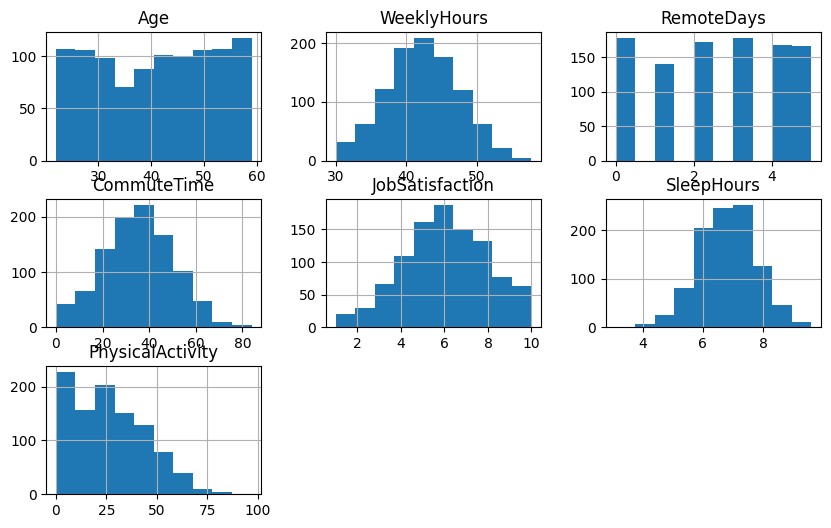

In [10]:
df.hist(figsize=(10,6))

<h4>Variable objetivo</h4>

In [11]:
df["HighStress"].value_counts()

HighStress
Yes    524
No     476
Name: count, dtype: int64

In [12]:
df["HighStress"].value_counts(normalize=True) * 100

HighStress
Yes    52.4
No     47.6
Name: proportion, dtype: float64

<h2>4. Limpieza de Datos (Data Cleaning)</h2>

In [16]:
df = pd.DataFrame([
    # id_cliente, nombre, sexo, edad, ingresos, fecha_alta, pais, target, codigo_postal, fuente, columna_constante
    [1001, "Ana",   "F",         29, "1200,50", "2025-02-01", "ES", 0, "28013", "web",    "X"],
    [1002, "Luis",  "Masculino", 34, "900.00",  "01/03/2025", "ES", 0, "08001", "tienda", "X"],
    [1003, "Marta", "femenino ", -3, "1500,00", "2025-13-10", "ES", 1, "46001", "WEB ",   "X"],  # edad negativa + fecha inválida
    [1004, "Juan",  "m",         999,"-50",     "2024-12-15", "ES", 0, "29001", "app",    "X"],  # edad imposible + ingresos negativos
    [1005, "Sara",  "SI",        41, "2.300,10","2025/04/20", "ES", 1, "41001", "web",    "X"],  # ingresos con miles y coma
    [1006, "Pablo", "M ",        22, None,      "2025-05-05", "ES", 0, "50001", "tienda", "X"],  # missing ingresos
    [1007, "Noa",   "f",         37, "NaN",     "2025-05-xx", "ES", 1, "03001", "Web",    "X"],  # ingresos NaN texto + fecha inválida
    [1008, "Leo",   "masc",      19, "800,5",   "2025-06-01", "ES", 0, "07001", "  app",  "X"],  # sexo inconsistente + espacios
    [1009, "Irene", "Femenino",  120,"1000",    "2025-07-15", "ES", 1, "01001", "tienda", "X"],  # límite superior
    [1010, "Omar",  "H",         45, "1100,00", "2025-08-01", "ES", 0, "14001", "web",    "X"],  # categoría rara para sexo
    # Duplicado exacto (para probar drop_duplicates)
    [1002, "Luis",  "Masculino", 34, "900.00",  "01/03/2025", "ES", 0, "08001", "tienda", "X"],
], columns=[
    "id_cliente","nombre","sexo","edad","ingresos","fecha_alta","pais","target","codigo_postal","fuente","columna_constante"
])

In [14]:
df.head(10)


,id_cliente,nombre,sexo,edad,ingresos,fecha_alta,pais,target,codigo_postal,fuente,columna_constante
0,1001,Ana,F,29,"1200,50",2025-02-01,ES,0,28013,web,X
1,1002,Luis,Masculino,34,900.00,01/03/2025,ES,0,08001,tienda,X
2,1003,Marta,femenino,-3,"1500,00",2025-13-10,ES,1,46001,WEB,X
3,1004,Juan,m,999,-50,2024-12-15,ES,0,29001,app,X
4,1005,Sara,SI,41,"2.300,10",2025/04/20,ES,1,41001,web,X
5,1006,Pablo,M,22,None,2025-05-05,ES,0,50001,tienda,X
6,1007,Noa,f,37,NaN,2025-05-xx,ES,1,03001,Web,X
7,1008,Leo,masc,19,"800,5",2025-06-01,ES,0,07001,app,X
8,1009,Irene,Femenino,120,1000,2025-07-15,ES,1,01001,tienda,X
9,1010,Omar,H,45,"1100,00",2025-08-01,ES,0,14001,web,X


<h4>Duplicados</h4>

In [15]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
dtype: bool

In [16]:
print("Duplicados:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicados tras limpiar:", df.duplicated().sum())


Duplicados: 1
Duplicados tras limpiar: 0


<h4>Valores inconsistentes:Unificar categorías inconsistentes (ej: sexo)</h4>

In [17]:
df["sexo"]

0            F
1    Masculino
2    femenino 
3            m
4           SI
5           M 
6            f
7         masc
8     Femenino
9            H
Name: sexo, dtype: object

In [18]:
map_sexo = {
    "m": "masculino",
    "M": "masculino",
    "masculino": "masculino",
    "masc": "masculino",
    "h": "masculino",
    "H": "masculino",
    "f": "femenino",
    "F": "femenino",
    "femenino": "femenino"
}
df["sexo"] = df["sexo"].replace(map_sexo)

# Opcional: lo que no se haya podido mapear -> NaN para tratarlo luego
df.loc[~df["sexo"].isin(["masculino", "femenino"]), "sexo"] = pd.NA

df["sexo"].value_counts(dropna=False)

sexo
<NA>         5
masculino    3
femenino     2
Name: count, dtype: int64

In [19]:
df["sexo"]

0     femenino
1         <NA>
2         <NA>
3    masculino
4         <NA>
5         <NA>
6     femenino
7    masculino
8         <NA>
9    masculino
Name: sexo, dtype: object

<h4>Errores de rango:Corregir rangos imposibles (edad)</h4>

In [17]:
df["edad"].head(10)

0     29
1     34
2     -3
3    999
4     41
5     22
6     37
7     19
8    120
9     45
Name: edad, dtype: int64

In [18]:
df["edad"].describe()

count     11.000000
mean     125.181818
std      291.394515
min       -3.000000
25%       25.500000
50%       34.000000
75%       43.000000
max      999.000000
Name: edad, dtype: float64

In [19]:
# Convertir a numérico, errores -> NaN
df["edad"] = pd.to_numeric(df["edad"], errors="coerce")

# Reglas de rango razonables
#df.loc[(df["edad"] < 0) | (df["edad"] > 120), "edad"] = pd.NA
df.loc[df["edad"] < 18, "edad"] = 18
df.loc[df["edad"] > 120, "edad"] = 120


In [20]:
df["edad"].head(10)

0     29
1     34
2     18
3    120
4     41
5     22
6     37
7     19
8    120
9     45
Name: edad, dtype: int64

In [21]:
df["edad"].describe()

count     11.000000
mean      47.181818
std       37.026526
min       18.000000
25%       25.500000
50%       34.000000
75%       43.000000
max      120.000000
Name: edad, dtype: float64

<h4>Variables irrelevantes:Eliminar variables irrelevantes o problemáticas</h4>

In [23]:
# Detectar columnas constantes
constantes = [c for c in df.columns if df[c].nunique(dropna=False) == 1]
print("Constantes:", constantes)



Constantes: ['pais', 'columna_constante']


In [24]:
df = df.drop(columns=["id_cliente"] + constantes)
df.columns

Index(['nombre', 'sexo', 'edad', 'ingresos', 'fecha_alta', 'target',
       'codigo_postal', 'fuente'],
      dtype='object')

<h4>Formatos incorrectos:Arreglar números mal formateados (ingresos)</h4>

In [5]:
df["ingresos"].head(10)

0     1200,50
1      900.00
2     1500,00
3         -50
4    2.300,10
5        None
6         NaN
7       800,5
8        1000
9     1100,00
Name: ingresos, dtype: object

In [25]:
df["ingresos"].describe()

count           9
unique          9
top       1200,50
freq            1
Name: ingresos, dtype: object

In [26]:
# Pasar todo a string para limpiar, manteniendo NAs
s = df["ingresos"].astype(str).str.strip().replace({"None": pd.NA, "nan": pd.NA, "NaN": pd.NA})

# Quitar separador de miles (.) y cambiar coma decimal por punto
s = s.str.replace(".", "", regex=False).str.replace(",", ".", regex=False)

df["ingresos"] = pd.to_numeric(s, errors="coerce")

# Ingresos negativos -> NaN (si los consideras error)
df.loc[df["ingresos"] < 0, "ingresos"] = pd.NA



In [27]:
df["ingresos"].describe()

count        7.000000
mean     13985.871429
std      33522.629827
min        800.500000
25%       1050.000000
50%       1200.500000
75%       1900.050000
max      90000.000000
Name: ingresos, dtype: float64

<h4>Formatos incorrectos:Convertir fechas con formatos distintos / errores</h4>

In [22]:
df[["fecha_alta"]].head()

,fecha_alta
0,2025-02-01
1,01/03/2025
2,2025-13-10
3,2024-12-15
4,2025/04/20


<h2>5. Tratamiento de valores faltantes (Missing Values)</h2>

In [1]:
import pandas as pd

df_miss = pd.read_csv('dataset_missing_tipos.csv')
df_miss.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,col_drop_cols,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,NaN,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,NaN,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387
2,2025-01-01,B,app,1.836226,1.348656,0.466935,1,NaN,NaN,62.370505,27.285677,bajo,si,164.729416,39.891790,7.858057,NaN,100.956497
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,NaN,NaN,25.151959,medio,no,112.469726,28.677732,NaN,-2.204822,99.356164
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,NaN,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313


In [24]:
missing_count = df_miss.isna().sum().sort_values(ascending=False)
missing_pct = (df_miss.isna().mean() * 100).sort_values(ascending=False)

print("Missing (conteo):\n", missing_count)
print("\nMissing (%):\n", missing_pct.round(2))

Missing (conteo):
 col_drop_cols       343
num_iterative        73
num_knn              72
num_mean             58
num_median           58
cat_mode             45
cat_constant         35
num_group_median     27
num_time             24
num_drop_rows        23
num_flag             20
fecha                 0
grupo                 0
target                0
canal                 0
x1                    0
x2                    0
x3                    0
dtype: int64

Missing (%):
 col_drop_cols       85.75
num_iterative       18.25
num_knn             18.00
num_mean            14.50
num_median          14.50
cat_mode            11.25
cat_constant         8.75
num_group_median     6.75
num_time             6.00
num_drop_rows        5.75
num_flag             5.00
fecha                0.00
grupo                0.00
target               0.00
canal                0.00
x1                   0.00
x2                   0.00
x3                   0.00
dtype: float64


<h4>5.2.1 Eliminar filas (listwise deletion)</h4>

Eliminar filas donde falta una columna crítica:

In [3]:
df_clean = df_miss.dropna(subset=["num_drop_rows"]).copy()

Eliminar filas con cualquier missing:

In [26]:
#df_clean = df_miss.dropna()


In [27]:
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,col_drop_cols,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,NaN,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,NaN,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,NaN,NaN,25.151959,medio,no,112.469726,28.677732,NaN,-2.204822,99.356164
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,NaN,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,NaN,30.299850,7.811347,bajo,no,110.508892,16.592626,NaN,-5.940546,102.594478


<h4>5.2.2 Eliminar columnas (Drop columns)</h4>

In [28]:
threshold = 0.70  # 70%
cols_to_drop = df_clean.columns[df_clean.isna().mean() > threshold]
df_clean = df_clean.drop(columns=cols_to_drop)

In [29]:
cols_to_drop

Index(['col_drop_cols'], dtype='object')

In [30]:
missing_count = df_clean.isna().sum().sort_values(ascending=False)
missing_pct = (df_clean.isna().mean() * 100).sort_values(ascending=False)

print("Missing (conteo):\n", missing_count)
print("\nMissing (%):\n", missing_pct.round(2))

Missing (conteo):
 num_knn             69
num_iterative       68
num_mean            58
num_median          52
cat_mode            43
cat_constant        34
num_group_median    24
num_time            24
num_flag            19
fecha                0
num_drop_rows        0
x3                   0
target               0
canal                0
x1                   0
grupo                0
x2                   0
dtype: int64

Missing (%):
 num_knn             18.30
num_iterative       18.04
num_mean            15.38
num_median          13.79
cat_mode            11.41
cat_constant         9.02
num_group_median     6.37
num_time             6.37
num_flag             5.04
fecha                0.00
num_drop_rows        0.00
x3                   0.00
target               0.00
canal                0.00
x1                   0.00
grupo                0.00
x2                   0.00
dtype: float64


In [31]:
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,NaN,25.151959,medio,no,112.469726,28.677732,NaN,-2.204822,99.356164
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,NaN,-5.940546,102.594478


<h4>5.2.3 Imputación Simple</h4>

5.2.3.1 Media


In [32]:
df_clean["num_mean"] = df_clean["num_mean"].fillna(df_clean["num_mean"].mean())

5.2.3.2 Mediana


In [33]:
df_clean["num_median"] = df_clean["num_median"].fillna(df_clean["num_median"].median())

5.2.3.3 Moda

In [34]:
df_clean["cat_mode"] = df_clean["cat_mode"].fillna(df_clean["cat_mode"].mode()[0])

In [35]:
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,50.135018,25.151959,medio,no,112.469726,28.677732,NaN,-2.204822,99.356164
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,NaN,-5.940546,102.594478


<h4>5.2.4 Imputación por constante (“desconocido”, “no informado”)</h4>

In [36]:
df_clean["cat_constant"] = df_clean["cat_constant"].fillna("desconocido")
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,50.135018,25.151959,medio,no,112.469726,28.677732,NaN,-2.204822,99.356164
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,NaN,-5.940546,102.594478


<h4>5.2.5 Imputación por grupos (Group-wise)</h4>

In [43]:
df_clean["num_group_median"] = df_clean["num_group_median"].fillna(df_clean.groupby("grupo")["num_group_median"].transform("median"))
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,50.135018,25.151959,medio,no,112.469726,28.677732,NaN,-2.204822,99.356164
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,NaN,-5.940546,102.594478


<h4>5.2.6 Indicador de missing (Missing flag)</h4>

In [44]:
df_clean["num_flag_missing"] = df_clean["num_flag"].isna().astype(int)
df_clean["num_flag"] = df_clean["num_flag"].fillna(df_clean["num_flag"].median())

In [45]:
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time,num_flag_missing
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604,0
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387,0
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,50.135018,25.151959,medio,no,112.469726,28.677732,NaN,-2.204822,99.356164,0
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313,0
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,NaN,-5.940546,102.594478,0


<h4>5.2.7 KNN Imputer (vecinos)</h4>

In [46]:
from sklearn.impute import KNNImputer
#num_knn depende directamente de x1, x2 y x3
#Hay correlación real entre ellas
cols = ["x1", "x2", "x3", "num_knn"]

imputer = KNNImputer(n_neighbors=5)
df_clean[cols] = imputer.fit_transform(df_clean[cols])

In [47]:
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time,num_flag_missing
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604,0
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,NaN,98.429387,0
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,50.135018,25.151959,medio,no,112.469726,28.677732,4.245145,-2.204822,99.356164,0
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313,0
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,1.429675,-5.940546,102.594478,0


<h4>5.2.7 IterativeImputer (model-based)</h4>

In [48]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


cols = ["x1", "x2", "x3", "num_iterative"]
imputer = IterativeImputer(random_state=42, max_iter=10)
df_clean[cols] = imputer.fit_transform(df_clean[cols])


#Se pueden usar otros otros estimadores (Algoritmos)
#imputer = IterativeImputer(
#    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
#    random_state=42)

In [49]:
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time,num_flag_missing
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604,0
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,-2.578972,98.429387,0
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,50.135018,25.151959,medio,no,112.469726,28.677732,4.245145,-2.204822,99.356164,0
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313,0
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,1.429675,-5.940546,102.594478,0


<h4>5.2.8 Series temporales (ffill/bfill/interpolate)</h4>

Forward fill (ffill)

In [50]:
df_clean = df_clean.sort_values("fecha").copy()
df_clean["num_time"] = df_clean["num_time"].ffill()

In [51]:
df_clean.head()

,fecha,grupo,canal,x1,x2,x3,target,num_drop_rows,num_mean,num_median,cat_mode,cat_constant,num_group_median,num_flag,num_knn,num_iterative,num_time,num_flag_missing
0,2025-01-01,A,web,-1.733209,-1.528288,0.349864,0,6.973098,51.977320,36.412459,alto,si,89.052183,19.210646,3.388717,-5.139317,99.904604,0
1,2025-01-01,A,web,-0.302620,-0.043633,0.068503,1,7.585144,57.030255,24.631497,medio,no,104.038531,28.135892,4.177061,-2.578972,98.429387,0
3,2025-01-01,A,app,-0.218029,-0.292921,-0.691018,0,11.836934,50.135018,25.151959,medio,no,112.469726,28.677732,4.245145,-2.204822,99.356164,0
4,2025-01-01,B,web,0.700723,0.739866,-0.610250,1,12.041382,63.079156,115.019615,bajo,si,148.378644,35.628802,5.410144,-0.329172,99.872313,0
5,2025-01-02,A,app,-2.097451,-1.159575,-0.304111,0,7.278511,30.299850,7.811347,bajo,no,110.508892,16.592626,1.429675,-5.940546,102.594478,0


Backward fill (bfill)

In [52]:
#df_clean = df_clean.sort_values("fecha").copy()
#df_clean["num_time"] = df_clean["num_time"].bfill()

Interpolación

In [53]:
#df_clean = df_clean.sort_values("fecha").copy()
#df_clean["num_time"] = df_clean["num_time"].interpolate()

<h2>6. Tratamiento de valores atípicos (outliers)</h2>

In [3]:
import pandas as pd

df = pd.read_csv('dataset_outliers.csv')
df.head()

,employee_id,salary
0,E0185,7000.000000
1,E0164,1871.727073
2,E0019,1836.790370
3,E0016,1975.084988
4,E0068,2601.413159


In [15]:
df.describe()

,salary
count,189.000000
mean,2536.803320
std,2893.419973
min,300.000000
25%,1919.178762
50%,2202.045383
75%,2444.670516
max,35000.000000


Boxplots

<Axes: >

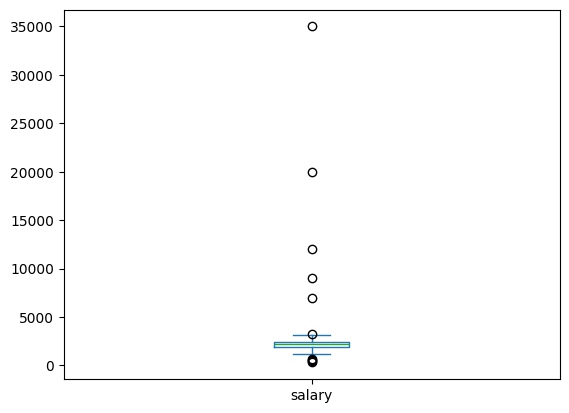

In [5]:
df["salary"].plot(kind="box")

<h4>6.1.1 Rango intercuartílico (IQR)</h4>

In [7]:
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Q1: ",Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)
print("lower: ",lower)
print("upper: ",upper)

outliers_iqr = df[(df["salary"] < lower) | (df["salary"] > upper)]
len(outliers_iqr)

Q1:  1919.178762449059
Q3:  2444.670515536347
IQR:  525.4917530872881
lower:  1130.9411328181268
upper:  3232.908145167279


10

In [25]:
outliers_iqr.head()

,employee_id,salary
0,E0185,7000.0
25,E0188,20000.0
59,E0182,450.0
67,E0181,300.0
112,E0184,700.0


In [12]:
df_sin_outliers = df.drop(outliers_iqr.index)

In [16]:
df_sin_outliers.head()

,employee_id,salary
1,E0164,1871.727073
2,E0019,1836.790370
3,E0016,1975.084988
4,E0068,2601.413159
5,E0109,2303.020156


In [17]:
#df_sin_outliers["salary"].describe()

<h4>6.1.2 Z-score (desviaciones estándar)</h4>

In [18]:
df["salary"].describe()

count      189.000000
mean      2536.803320
std       2893.419973
min        300.000000
25%       1919.178762
50%       2202.045383
75%       2444.670516
max      35000.000000
Name: salary, dtype: float64

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

z = pd.Series(
    zscore(df["salary"]),
    index=df.index
)


In [27]:
# -----------------------------
# 2) Calcular media y desviación típica
# -----------------------------
mean_salary = df["salary"].mean()
std_salary = df["salary"].std(ddof=0)  # desviación poblacional (más didáctico para explicar)
print("📊 Estadísticas básicas:")
print(f"Media (μ) = {mean_salary:.2f}")
print(f"Desviación típica (σ) = {std_salary:.2f}")

# -----------------------------
# 3) Definir umbral Z-Score
# -----------------------------
z_threshold = 3  # típico: 3 sigmas

lower_limit = mean_salary - z_threshold * std_salary
upper_limit = mean_salary + z_threshold * std_salary

print("\n📏 Umbrales usando Z-Score (±3σ):")
print(f"Límite inferior = μ - 3σ = {lower_limit:.2f}")
print(f"Límite superior = μ + 3σ = {upper_limit:.2f}")

print("\n" + "="*60 + "\n")


📊 Estadísticas básicas:
Media (μ) = 2536.80
Desviación típica (σ) = 2885.76

📏 Umbrales usando Z-Score (±3σ):
Límite inferior = μ - 3σ = -6120.46
Límite superior = μ + 3σ = 11194.07




In [28]:
# -----------------------------
# 4) Calcular Z-Score de cada valor
# -----------------------------
df["z_score"] = (df["salary"] - mean_salary) / std_salary

# -----------------------------
# 5) Detectar outliers
# -----------------------------
outliers = df[np.abs(df["z_score"]) > z_threshold]

print("🚨 Outliers detectados con Z-Score:")
print(f"Número total de outliers: {len(outliers)}")

# Separar bajos y altos para que se vea más claro
outliers_low = outliers[outliers["salary"] < lower_limit].sort_values("salary")
outliers_high = outliers[outliers["salary"] > upper_limit].sort_values("salary")

print("\n⬇️ Outliers bajos (salary < límite inferior):")
if len(outliers_low) == 0:
    print("Ninguno")
else:
    print(outliers_low[["employee_id", "salary", "z_score"]])

print("\n⬆️ Outliers altos (salary > límite superior):")
if len(outliers_high) == 0:
    print("Ninguno")
else:
    print(outliers_high[["employee_id", "salary", "z_score"]])

print("\n" + "="*60 + "\n")

# -----------------------------
# 6) Mensaje didáctico final
# -----------------------------
print("📌 Nota didáctica:")
print("- El Z-Score depende de la media y la desviación típica.")
print("- Los valores extremos inflan σ y pueden hacer que algunos outliers 'no parezcan' tan extremos.")
print("- Por eso Z-Score es sensible a distribuciones sesgadas o con valores muy extremos.")
print("\n✅ Fin del análisis con Z-Score.")

🚨 Outliers detectados con Z-Score:
Número total de outliers: 3

⬇️ Outliers bajos (salary < límite inferior):
Ninguno

⬆️ Outliers altos (salary > límite superior):
    employee_id   salary    z_score
125       E0187  12000.0   3.279279
25        E0188  20000.0   6.051517
181       E0189  35000.0  11.249463


📌 Nota didáctica:
- El Z-Score depende de la media y la desviación típica.
- Los valores extremos inflan σ y pueden hacer que algunos outliers 'no parezcan' tan extremos.
- Por eso Z-Score es sensible a distribuciones sesgadas o con valores muy extremos.

✅ Fin del análisis con Z-Score.


In [29]:
#outliers_z = df.loc[z.abs() > 3]

In [30]:
#outliers_z.head()

<h4>6.2.1 Eliminación de outliers (trimming)</h4>

In [11]:
print("lower:\n", lower)
print("upper:\n", upper)

lower:
 -18.08898488199256
upper:
 83.10689802505112


In [61]:
df_clean = df_clean[(df_clean["num_median"] >= lower) & (df_clean["num_median"] <= upper)]

<h4>6.2.2 Recorte/ Limitar (Clipping)<h4>

No elimina filas.
No borra datos.
Modifica los valores extremos.

Qué es clip

clip(a, b) hace esto:

Si el valor < lower → lo cambia a lower

Si el valor > upper → lo cambia a upper

Si está entre ambos → lo deja igual

In [62]:
#df_clip["num_median"] = df_clip["num_median"].clip(lower, upper)

<h2>7. Codificación de variables categóricas</h2>

In [110]:
import pandas as pd

df = pd.read_csv("dataset_categoricas_demo.csv")

# Imputación simple para categóricas (modo) / o constante
for col in ["canal", "grupo", "cat_mode", "ciudad"]:
    df[col] = df[col].fillna(df[col].mode()[0])

df[["canal", "grupo", "cat_mode", "ciudad", "target"]].head()


,canal,grupo,cat_mode,ciudad,target
0,tienda,C,medio,Valencia,0
1,web,C,bajo,Valencia,0
2,tienda,A,medio,Madrid,1
3,app,B,bajo,Granada,0
4,web,A,bajo,Madrid,0


<h4>7.1 Label Encoding (ejemplo con grupo)</h4>

In [111]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()
le = LabelEncoder()

df_label["grupo_label"] = le.fit_transform(df_label["grupo"])

mapeo = dict(zip(le.classes_, le.transform(le.classes_)))
mapeo, df_label[["grupo", "grupo_label"]].head()



({'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2)},
   grupo  grupo_label
 0     C            2
 1     C            2
 2     A            0
 3     B            1
 4     A            0)

<h4>7.1 Label Encoding (ejemplo con cat_mode: bajo < medio < alto)</h4>

In [113]:
from sklearn.preprocessing import OrdinalEncoder

df_ord = df.copy()

ord_enc = OrdinalEncoder(
    categories=[["bajo", "medio", "alto"]],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

df_ord["cat_mode_ord"] = ord_enc.fit_transform(df_ord[["cat_mode"]])
df_ord[["cat_mode", "cat_mode_ord"]].head()


,cat_mode,cat_mode_ord
0,medio,1.0
1,bajo,0.0
2,medio,1.0
3,bajo,0.0
4,bajo,0.0


<h4>7.2 One-Hot Encoding (OHE) (ejemplo con canal y grupo)</h4>

In [112]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = df[["canal", "grupo"]]

X_ohe = ohe.fit_transform(X_cat)
cols_ohe = ohe.get_feature_names_out(["canal", "grupo"])

df_ohe_sklearn = pd.DataFrame(X_ohe, columns=cols_ohe, index=df.index)
df_ohe_sklearn.head()


,canal_app,canal_email,canal_tienda,canal_web,grupo_A,grupo_B,grupo_C
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### <h4>7.3 Frequency Encoding (proporción) – base</h4>

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset_categoricas_demo.csv")

# Imputación simple para que no haya NaN en ciudad
df["ciudad"] = df["ciudad"].fillna(df["ciudad"].mode()[0])

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [115]:
# FIT solo en train
freq_train = X_train["ciudad"].value_counts(normalize=True)

# TRANSFORM en train y test con el mismo diccionario
X_train = X_train.copy()
X_test = X_test.copy()

X_train["ciudad_freq"] = X_train["ciudad"].map(freq_train)
X_test["ciudad_freq"]  = X_test["ciudad"].map(freq_train)

# Categorías nuevas en test (si aparecen) -> 0 (muy común)
X_train["ciudad_freq"] = X_train["ciudad_freq"].fillna(0)
X_test["ciudad_freq"]  = X_test["ciudad_freq"].fillna(0)

X_train[["ciudad", "ciudad_freq"]].head()



,ciudad,ciudad_freq
165,Barcelona,0.173469
26,Barcelona,0.173469
191,Málaga,0.081633
138,Barcelona,0.173469
23,Madrid,0.290816


Mitigación A — StandardScaler (reduce el peso de la magnitud)

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# FIT solo con train (en la columna ya codificada)
X_train["ciudad_freq_scaled"] = scaler.fit_transform(X_train[["ciudad_freq"]])

# TRANSFORM en test con el mismo scaler
X_test["ciudad_freq_scaled"]  = scaler.transform(X_test[["ciudad_freq"]])

X_train[["ciudad_freq", "ciudad_freq_scaled"]].head()


,ciudad_freq,ciudad_freq_scaled
165,0.173469,0.113073
26,0.173469,0.113073
191,0.081633,-0.915079
138,0.173469,0.113073
23,0.290816,1.426824


Mitigación B — Transformación Log (log1p) (comprime diferencias)

In [117]:
# log1p(x) = log(1 + x) para evitar problemas con 0
X_train["ciudad_freq_log"] = np.log1p(X_train["ciudad_freq"])
X_test["ciudad_freq_log"]  = np.log1p(X_test["ciudad_freq"])

X_train[["ciudad_freq", "ciudad_freq_log"]].head()


,ciudad_freq,ciudad_freq_log
165,0.173469,0.159965
26,0.173469,0.159965
191,0.081633,0.078472
138,0.173469,0.159965
23,0.290816,0.255275


<h4>7.4 Target Encoding (proporción) – ciudad</h4>

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset_categoricas_demo.csv")

# Imputación simple para que no haya NaN en ciudad
df["ciudad"] = df["ciudad"].fillna(df["ciudad"].mode()[0])

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [119]:
global_mean = y_train.mean()
means_train = X_train.join(y_train).groupby("ciudad")["target"].mean()

# Aplicar a train y test
X_train = X_train.copy()
X_test  = X_test.copy()

X_train["ciudad_te"] = X_train["ciudad"].map(means_train).fillna(global_mean)
X_test["ciudad_te"]  = X_test["ciudad"].map(means_train).fillna(global_mean)

# (Opcional) eliminar columna original
# X_train = X_train.drop(columns=["ciudad"])
# X_test  = X_test.drop(columns=["ciudad"])

print("Media global del target (train):", round(global_mean, 4))
print("\nEjemplo TRAIN:")
print(X_train[["ciudad", "ciudad_te"]].head())

print("\nEjemplo TEST:")
print(X_test[["ciudad", "ciudad_te"]].head())

print("\n¿Train y test tienen las mismas columnas?",
      set(X_train.columns) == set(X_test.columns))

Media global del target (train): 0.4541

Ejemplo TRAIN:
        ciudad  ciudad_te
165  Barcelona   0.558824
26   Barcelona   0.558824
191     Málaga   0.312500
138  Barcelona   0.558824
23      Madrid   0.508772

Ejemplo TEST:
        ciudad  ciudad_te
32   Barcelona   0.558824
152    Granada   0.285714
36   Barcelona   0.558824
147   Zaragoza   0.294118
232  Barcelona   0.558824

¿Train y test tienen las mismas columnas? True


<h2>8. Escalado de Datos</h2>

In [31]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("dataset_escalado.csv")

df.head()


,horas_estudio,edad,ingresos,tasa_conversion,delta_consumo,visitas,target
0,5.609434,30,1850.384388,0.370079,5.927597,31,1
1,2.920032,39,1499.597776,0.368863,4.846249,48,1
2,6.500902,21,3393.454698,0.093902,-4.741873,34,1
3,6.881129,59,1205.186513,0.053585,-16.524327,35,1
4,1.097930,51,1077.726732,0.078078,9.987496,37,1


In [65]:
num_cols = [
    "horas_estudio",
    "edad",
    "ingresos",
    "tasa_conversion",
    "delta_consumo",
    "visitas"
]

df_num = df[num_cols]
df_num.head()

,horas_estudio,edad,ingresos,tasa_conversion,delta_consumo,visitas
0,5.609434,30,1850.384388,0.370079,5.927597,31
1,2.920032,39,1499.597776,0.368863,4.846249,48
2,6.500902,21,3393.454698,0.093902,-4.741873,34
3,6.881129,59,1205.186513,0.053585,-16.524327,35
4,1.097930,51,1077.726732,0.078078,9.987496,37


<h4>8.1.1.1 StandardScaler)</h4>

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_std = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=num_cols
)

df_std.head()


,horas_estudio,edad,ingresos,tasa_conversion,delta_consumo,visitas
0,0.340010,-0.850463,-0.214001,1.934750,0.404487,-1.424766
1,-1.045494,-0.256656,-0.326721,1.922993,0.330148,1.372119
2,0.799270,-1.444270,0.281841,-0.736891,-0.329008,-0.931198
3,0.995152,1.062914,-0.421325,-1.126905,-1.139018,-0.766676
4,-1.984189,0.535086,-0.462283,-0.889969,0.683594,-0.437630


<h4>8.1.1.2 RobustScaler</h4>

In [67]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_robust = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=num_cols
)

df_robust.head()


,horas_estudio,edad,ingresos,tasa_conversion,delta_consumo,visitas
0,0.253696,-0.461538,-0.016702,1.646671,0.328785,-1.103448
1,-0.792606,-0.115385,-0.249610,1.637467,0.272153,1.241379
2,0.600519,-0.807692,1.007832,-0.444851,-0.229990,-0.689655
3,0.748445,0.653846,-0.445087,-0.750178,-0.847053,-0.551724
4,-1.501488,0.346154,-0.529715,-0.564691,0.541407,-0.275862


<h4>8.1.1.3 MinMaxScaler</h4>

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=num_cols
)

df_minmax.head()


,horas_estudio,edad,ingresos,tasa_conversion,delta_consumo,visitas
0,0.518062,0.235294,0.042248,0.624217,0.495755,0.300
1,0.269681,0.411765,0.033255,0.622149,0.483871,0.725
2,0.600394,0.058824,0.081811,0.154281,0.378500,0.375
3,0.635510,0.803922,0.025706,0.085679,0.249013,0.400
4,0.101400,0.647059,0.022439,0.127355,0.540372,0.450


<h4>8.1.1.4 MaxAbsScaler</h4>

In [69]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

df_maxabs = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=num_cols
)

df_maxabs.head()


,horas_estudio,edad,ingresos,tasa_conversion,delta_consumo,visitas
0,0.518062,0.434783,0.047196,0.626273,0.114409,0.525424
1,0.269681,0.565217,0.038249,0.624216,0.093538,0.813559
2,0.600394,0.304348,0.086554,0.158908,-0.091523,0.576271
3,0.635510,0.855072,0.030740,0.090681,-0.318937,0.593220
4,0.101400,0.739130,0.027489,0.132129,0.192769,0.627119


<h2>9. Features Engineering</h2>

<h4>9.2.1 Creación de Nuevas Variables</h4>

In [86]:
import numpy as np
import pandas as pd

# =========================
# 2) CARGAR DATASET
# =========================
df = pd.read_csv("dataset_crear_variables.csv", parse_dates=["date"])

df.head()

,order_id,date,customer_id,category,unit_price,unit_cost,quantity,distance_km,shipping_cost,age,height_m,weight_kg
0,O00001,2024-01-01,C023,sports,14.77,10.94,4,2.76,3.87,26,1.80,69.9
1,O00002,2024-01-01,C005,fashion,87.55,72.57,5,1.06,2.51,38,1.80,86.7
2,O00003,2024-01-01,C012,electronics,501.70,310.24,1,9.18,6.33,25,1.56,104.6
3,O00004,2024-01-01,C007,electronics,323.84,199.37,1,3.12,3.18,45,1.94,64.0
4,O00005,2024-01-01,C020,fashion,101.09,68.07,5,1.07,3.20,26,1.86,61.9


In [88]:
import numpy as np
import pandas as pd

print("=== : Feature Engineering  ===\n")


print("✅ Dataset cargado y ordenado por cliente y fecha.")
print("Filas:", len(df), "| Columnas:", df.shape[1])
print(df.head(3))
print("\n" + "="*70 + "\n")

# ======================================================
# 9.2.1.1 Interacciones entre variables
# ======================================================
print("9.2.1.1 INTERACCIONES ENTRE VARIABLES")
print("Qué hace: crea nuevas variables combinando otras para capturar relaciones implícitas.")
print("Ejemplos: revenue = unit_price * quantity; distance_x_quantity = distance_km * quantity\n")

df["revenue"] = df["unit_price"] * df["quantity"]
df["product_cost_total"] = df["unit_cost"] * df["quantity"]
df["distance_x_quantity"] = df["distance_km"] * df["quantity"]

print("Muestra de columnas creadas:")
print(df[["unit_price", "quantity", "revenue", "unit_cost", "product_cost_total", "distance_km", "distance_x_quantity"]].head(5))
print("\n" + "="*70 + "\n")

# ======================================================
# 9.2.1.2 Ratios y proporciones
# ======================================================
print("9.2.1.2 RATIOS Y PROPORCIONES")
print("Qué hace: crea variables que expresan relaciones relativas (porcentajes, costes por euro, etc.).")
print("Ejemplos: margin_pct = (revenue - product_cost_total) / revenue; shipping_per_euro = shipping_cost / revenue\n")

df["gross_profit"] = df["revenue"] - df["product_cost_total"]
df["margin_pct"] = np.where(df["revenue"] > 0, df["gross_profit"] / df["revenue"], 0.0)
df["shipping_per_euro"] = np.where(df["revenue"] > 0, df["shipping_cost"] / df["revenue"], 0.0)

print("Muestra de ratios creados:")
print(df[["revenue", "product_cost_total", "gross_profit", "margin_pct", "shipping_cost", "shipping_per_euro"]].head(5))
print("\n" + "="*70 + "\n")

# ======================================================
# 9.2.1.3 Agregaciones
# ======================================================
print("9.2.1.3 AGREGACIONES")
print("Qué hace: resume información de muchos registros (por cliente, por cliente+categoría, etc.).")
print("Ejemplos: total gastado por cliente, ticket medio, nº de pedidos, gasto por cliente+categoría\n")

df["customer_total_revenue"] = df.groupby("customer_id")["revenue"].transform("sum")
df["customer_avg_revenue"] = df.groupby("customer_id")["revenue"].transform("mean")
df["customer_num_orders"] = df.groupby("customer_id")["order_id"].transform("count")
df["customer_category_revenue"] = df.groupby(["customer_id", "category"])["revenue"].transform("sum")

print("Muestra (mismas columnas repetidas por cada fila del cliente):")
print(df[["customer_id", "category", "revenue", "customer_total_revenue", "customer_avg_revenue",
          "customer_num_orders", "customer_category_revenue"]].head(8))
print("\n" + "="*70 + "\n")

# ======================================================
# 9.2.1.4 Variables basadas en conocimiento del dominio
# ======================================================
print("9.2.1.4 VARIABLES BASADAS EN CONOCIMIENTO DEL DOMINIO")
print("Qué hace: crea features usando fórmulas/reglas del negocio o del dominio.")
print("Ejemplos: net_profit = gross_profit - shipping_cost; BMI = weight_kg / height_m^2\n")

df["net_profit"] = df["gross_profit"] - df["shipping_cost"]
df["bmi"] = df["weight_kg"] / (df["height_m"] ** 2)

# Ejemplo adicional de dominio (simple): ticket medio estimado del cliente
df["customer_avg_ticket"] = np.where(df["customer_num_orders"] > 0,
                                     df["customer_total_revenue"] / df["customer_num_orders"],
                                     0.0)

print("Muestra de features de dominio:")
print(df[["gross_profit", "shipping_cost", "net_profit", "weight_kg", "height_m", "bmi"]].head(5))
print("\n" + "="*70 + "\n")

# ======================================================
# 9.2.1.5 Ventanas temporales (lags y rolling features)
# ======================================================
print("9.2.1.5 VENTANAS TEMPORALES (LAGS Y ROLLING FEATURES)")
print("Qué hace: usa el histórico previo para crear contexto temporal (pedidos anteriores, medias móviles, etc.).")
print("IMPORTANTE: para evitar fuga de información, usamos shift(1) antes de rolling.\n")

# Lag 1 y Lag 2 por cliente (pedido anterior y el de hace 2)
df["revenue_lag_1"] = df.groupby("customer_id")["revenue"].shift(1)
df["revenue_lag_2"] = df.groupby("customer_id")["revenue"].shift(2)

# Media móvil de los últimos 3 pedidos previos (sin incluir el actual)
df["revenue_roll_mean_3_prev"] = (
    df.groupby("customer_id")["revenue"]
      .apply(lambda s: s.shift(1).rolling(window=3, min_periods=1).mean())
      .reset_index(level=0, drop=True)
)

# Suma móvil de los últimos 5 pedidos previos
df["revenue_roll_sum_5_prev"] = (
    df.groupby("customer_id")["revenue"]
      .apply(lambda s: s.shift(1).rolling(window=5, min_periods=1).sum())
      .reset_index(level=0, drop=True)
)

# Acumulado del gasto del cliente hasta el pedido anterior
df["customer_revenue_cum_prev"] = (
    df.groupby("customer_id")["revenue"]
      .apply(lambda s: s.shift(1).cumsum())
      .reset_index(level=0, drop=True)
)

print("Muestra (para un cliente concreto, para ver la secuencia temporal):")
one_customer = df["customer_id"].iloc[0]
sample = df[df["customer_id"] == one_customer].head(8)

print(f"Cliente seleccionado: {one_customer}")
print(sample[["date", "order_id", "revenue", "revenue_lag_1", "revenue_lag_2",
              "revenue_roll_mean_3_prev", "revenue_roll_sum_5_prev", "customer_revenue_cum_prev"]])

print("\n✅ Fin de ejemplos.")


=== : Feature Engineering  ===

✅ Dataset cargado y ordenado por cliente y fecha.
Filas: 463 | Columnas: 24
  order_id       date customer_id     category  unit_price  unit_cost  \
0   O00001 2024-01-01        C023       sports       14.77      10.94   
1   O00002 2024-01-01        C005      fashion       87.55      72.57   
2   O00003 2024-01-01        C012  electronics      501.70     310.24   

   quantity  distance_km  shipping_cost  age  ...  distance_x_quantity  \
0         4         2.76           3.87   26  ...                11.04   
1         5         1.06           2.51   38  ...                 5.30   
2         1         9.18           6.33   25  ...                 9.18   

   gross_profit  margin_pct  shipping_per_euro  customer_total_revenue  \
0         15.32    0.259309           0.065504                 6658.01   
1         74.90    0.171102           0.005734                16250.44   
2        191.46    0.381622           0.012617                 5635.37   

   cu

<h4>9.2.2 Transformación de Variables</h4>

In [8]:
import numpy as np
import pandas as pd

print("=== Transformación de Variables (9.2.2) ===\n")

# =========================
# 1) CARGA Y PREPARACIÓN
# =========================
df = pd.read_csv("dataset_crear_variables.csv", parse_dates=["date"])
df = df.sort_values(["customer_id", "date", "order_id"]).reset_index(drop=True)

# Creamos una variable base que usaremos en varios ejemplos (revenue)
df["revenue"] = df["unit_price"] * df["quantity"]

print("✅ Dataset cargado.")
print("Muestra rápida:")
print(df[["date", "customer_id", "category", "unit_price", "quantity", "revenue", "distance_km"]].head(5))
print("\n" + "="*80 + "\n")

# ======================================================
# 9.2.2.1 Transformaciones matemáticas
# ======================================================
print("9.2.2.1 TRANSFORMACIONES MATEMÁTICAS")
print("Qué hace: cambia la forma de una variable (p.ej. reducir sesgo) para facilitar el aprendizaje.")
print("Ejemplos típicos: log(1+x), raíz, inversa.\n")

# 1) Log transform: útil con variables sesgadas (muchos valores pequeños y pocos muy grandes)
df["revenue_log1p"] = np.log1p(df["revenue"])  # log(1+revenue) evita problemas con 0

# 2) Raíz: suaviza valores grandes (menos agresivo que log)
df["distance_sqrt"] = np.sqrt(df["distance_km"])

# 3) Inversa (solo si no hay ceros): 1/(x+eps) para evitar división por 0
eps = 1e-6
df["distance_inv"] = 1 / (df["distance_km"] + eps)

print("Ejemplo (antes y después):")
print(df[["revenue", "revenue_log1p", "distance_km", "distance_sqrt", "distance_inv"]].head(8))
print("\nNota didáctica: log1p se usa mucho porque evita problemas cuando la variable puede ser 0.")
print("\n" + "="*80 + "\n")

# ======================================================
# 9.2.2.2 Discretización semántica
# ======================================================
print("9.2.2.2 DISCRETIZACIÓN SEMÁNTICA")
print("Qué hace: convierte un valor continuo en categorías con significado (más interpretable).")
print("Ejemplos: edad -> joven/adulto/senior; revenue -> bajo/medio/alto.\n")

# A) Discretización semántica de edad
# (rangos elegidos "con sentido", no matemáticamente perfectos)
bins_age = [0, 25, 45, 65, 120]
labels_age = ["joven", "adulto", "senior", "mayor"]

df["age_group"] = pd.cut(df["age"], bins=bins_age, labels=labels_age, right=True)

# B) Discretización semántica del revenue (ticket del pedido)
# Ejemplo de negocio: bajo < 50, medio 50-150, alto 150-300, premium > 300
bins_rev = [-np.inf, 50, 150, 300, np.inf]
labels_rev = ["bajo", "medio", "alto", "premium"]

df["ticket_level"] = pd.cut(df["revenue"], bins=bins_rev, labels=labels_rev, right=True)

print("Ejemplo de discretización (edad y ticket):")
print(df[["age", "age_group", "revenue", "ticket_level"]].head(12))

print("\nConteo por categorías (para ver distribución):")
print("age_group:")
print(df["age_group"].value_counts(dropna=False))
print("\nticket_level:")
print(df["ticket_level"].value_counts(dropna=False))
print("\n" + "="*80 + "\n")

# ======================================================
# 9.2.2.3 Transformaciones temporales
# ======================================================
print("9.2.2.3 TRANSFORMACIONES TEMPORALES")
print("Qué hace: extrae información útil desde una fecha/hora (el modelo no 'entiende' fechas directamente).")
print("Ejemplos: día semana, mes, trimestre, fin de semana, duración, etc.\n")

# A) Componentes de calendario
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.dayofweek  # 0=Lunes ... 6=Domingo
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)
df["quarter"] = df["date"].dt.quarter

# B) Variable semántica derivada del calendario: estación (ejemplo simple)
# (Hemisferio norte, aproximación por mes)
def month_to_season(m):
    if m in [12, 1, 2]:
        return "invierno"
    if m in [3, 4, 5]:
        return "primavera"
    if m in [6, 7, 8]:
        return "verano"
    return "otoño"

df["season"] = df["month"].apply(month_to_season)

# C) Ejemplo extra: "días desde la primera compra del cliente" (duración relativa)
# Esto convierte fechas en una medida muy útil (tiempo relativo)
first_date = df.groupby("customer_id")["date"].transform("min")
df["days_since_first_purchase"] = (df["date"] - first_date).dt.days

print("Ejemplo de transformaciones temporales:")
print(df[["date", "day_of_week", "is_weekend", "month", "quarter", "season", "days_since_first_purchase"]].head(15))

print("\nMuestra explicativa (un cliente, para ver cómo crece days_since_first_purchase):")
one_customer = df["customer_id"].iloc[0]
sample = df[df["customer_id"] == one_customer].head(10)
print(sample[["customer_id", "date", "days_since_first_purchase"]])

print("\n✅ Fin del Código C.")


=== Transformación de Variables (9.2.2) ===

✅ Dataset cargado.
Muestra rápida:
        date customer_id     category  unit_price  quantity  revenue  \
0 2024-01-02        C001  electronics      507.79         5  2538.95   
1 2024-01-07        C001  electronics       47.72         4   190.88   
2 2024-01-30        C001      fashion       89.31         1    89.31   
3 2024-02-02        C001        books       12.40         4    49.60   
4 2024-02-03        C001  electronics      411.36         1   411.36   

   distance_km  
0        25.99  
1        27.12  
2        18.77  
3        16.93  
4        20.67  


9.2.2.1 TRANSFORMACIONES MATEMÁTICAS
Qué hace: cambia la forma de una variable (p.ej. reducir sesgo) para facilitar el aprendizaje.
Ejemplos típicos: log(1+x), raíz, inversa.

Ejemplo (antes y después):
   revenue  revenue_log1p  distance_km  distance_sqrt  distance_inv
0  2538.95       7.839900        25.99       5.098039      0.038476
1   190.88       5.256870        27.12      

<h2>10. Features Selection</h2>

In [70]:
import pandas as pd

# Cargar dataset
df = pd.read_csv("dataset_feature_filter.csv")

X = df.drop(columns=["target"])
y = df["target"]

df.head()

,edad,ingresos,visitas,tiempo_web,constante,casi_constante,ruido,target
0,22,2129.797031,38,11.275967,1.0,0,0.287381,1
1,58,2240.630785,29,8.011110,1.0,0,0.154792,1
2,52,1930.944437,41,11.861628,1.0,0,-2.745614,1
3,40,700.882650,25,14.178075,1.0,0,-0.906474,1
4,40,409.091128,24,9.430418,1.0,0,-0.050847,1


<h4>10.2.1 Métodos Filter</h4>

<h4>1.Variance Threshold (Filtro por varianza)</h4>

In [71]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)


In [72]:
#Paso 2: ver qué variables se conservan
selected_features = X.columns[selector.get_support()]
selected_features

Index(['edad', 'ingresos', 'visitas', 'tiempo_web', 'casi_constante', 'ruido'], dtype='object')

In [73]:
#Paso 3: ver qué variables se eliminan
variables_eliminadas = X.columns[~selector.get_support()]
variables_eliminadas


Index(['constante'], dtype='object')

Ver la Varianza

In [74]:
variances = X.var().sort_values()
variances

constante         0.000000e+00
casi_constante    2.082447e-02
ruido             9.907320e-01
tiempo_web        2.365890e+01
visitas           2.968821e+01
edad              2.226742e+02
ingresos          1.485091e+06
dtype: float64

<h4>2. Correlación con el Target </h4>

In [2]:
import pandas as pd

# Cargar dataset
df = pd.read_csv('dataset_feature_correlacion.csv')

X = df.drop(columns=["target"])
y = df["target"]

df.head()

,tiempo_web,ingresos,edad,ruido,canal,target
0,11.490142,3135.760617,27,1.455021,app,1
1,9.585207,979.619487,52,0.003084,app,1
2,11.943066,1598.620936,68,-0.179210,app,1
3,14.569090,1022.677809,66,0.082513,app,1
4,9.297540,1045.659450,49,-0.161364,tienda,0


<h4>Correlación Pearson (lineal)</h4>

In [76]:
X_num = df.select_dtypes(include=["number"]).drop(columns=["target"])
y = df["target"]

In [77]:
corr_pearson = X_num.join(y).corr(method="pearson")["target"].sort_values(ascending=False)
corr_pearson


target        1.000000
tiempo_web    0.735466
edad          0.086764
ingresos      0.003461
ruido        -0.000581
Name: target, dtype: float64

In [78]:
selected_features = corr_pearson[abs(corr_pearson) > 0.65].index
selected_features

Index(['target', 'tiempo_web'], dtype='object')

<h4>Spearman (relación monótona)</h4>

In [79]:
X_num = df.select_dtypes(include=["number"]).drop(columns=["target"])
y = df["target"]

In [80]:
corr_spearman = X_num.join(y).corr(method="spearman")["target"].sort_values(ascending=False)
corr_spearman


target        1.000000
tiempo_web    0.787326
edad          0.086227
ruido        -0.013434
ingresos     -0.025385
Name: target, dtype: float64

In [81]:
pd.DataFrame({
    "Pearson": corr_pearson,
    "Spearman": corr_spearman
}).sort_values("Pearson", ascending=False)


,Pearson,Spearman
target,1.000000,1.000000
tiempo_web,0.735466,0.787326
edad,0.086764,0.086227
ingresos,0.003461,-0.025385
ruido,-0.000581,-0.013434


<h4>3.Dependencia Categórica</h4>

<h4>Chi-cuadrado (χ²)</h4>

Paso obligatorio: One-Hot Encoding
χ² necesita:

valores no negativos
variables discretas

In [83]:
X_cat = pd.get_dummies(df[["canal"]])
y = df["target"]

X_cat.head()


,canal_app,canal_tienda,canal_web
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False


In [84]:
from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(X_cat, y)

chi_results = pd.DataFrame({
    "chi2": chi_scores,
    "p_value": p_values
}, index=X_cat.columns).sort_values("chi2", ascending=False)

chi_results



,chi2,p_value
canal_app,15.706320,0.000074
canal_web,5.121693,0.023629
canal_tienda,2.882353,0.089555


In [85]:
selected_chi = chi_results[chi_results["p_value"] < 0.05].index
selected_chi



Index(['canal_app', 'canal_web'], dtype='object')

<h4>10.2.2 Métodos Wrapper</h4>

In [3]:
import pandas as pd

# Cargar dataset
df = pd.read_csv('dataset_feature_wrapper.csv')

X = df.drop(columns=["target"])
y = df["target"]

df.head()

,edad,ingresos,visitas,tiempo_web,ruido1,ruido2,target
0,56,2141.344549,24,10.830597,0.565687,0.873660,1
1,69,1560.499108,27,14.239762,-0.060731,-0.497264,0
2,46,432.656178,40,2.481757,1.551155,1.304088,1
3,32,3765.891141,33,5.243709,-2.166381,1.838768,1
4,60,5025.369883,29,10.739253,2.188057,0.842038,1


<h4>10.2.2.1.Forward Selection (Selección hacia delante)</h4>

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=500)
cv = 5

remaining = list(X.columns)
selected = []
best_score = 0.0

history_forward = []

step = 1
while remaining:
    results_step = []

    for candidate in remaining:
        features = selected + [candidate]
        score = cross_val_score(model, X[features], y, cv=cv, scoring="accuracy").mean()
        results_step.append((step, candidate, features, score))

    # Guardamos tabla del paso (para visualizar)
    df_step = pd.DataFrame(results_step, columns=["paso", "candidata", "features_probadas", "accuracy_cv"])
    df_step = df_step.sort_values("accuracy_cv", ascending=False)
    history_forward.append(df_step)

    # Elegimos la mejor candidata
    best_candidate = df_step.iloc[0]["candidata"]
    best_candidate_score = df_step.iloc[0]["accuracy_cv"]

    # Criterio de parada: si no mejora, paramos
    if best_candidate_score > best_score + 0.001:
        selected.append(best_candidate)
        remaining.remove(best_candidate)
        best_score = best_candidate_score
        step += 1
    else:
        break

# Mostrar resultados paso a paso
for df_step in history_forward:
    print("\n=== PASO", int(df_step.iloc[0]["paso"]), "===")
    display(df_step[["candidata", "accuracy_cv"]])

print("\nVariables seleccionadas:", selected)
print("Accuracy final:", best_score)



=== PASO 1 ===


,candidata,accuracy_cv
1,ingresos,0.656667
3,tiempo_web,0.598333
0,edad,0.580000
2,visitas,0.571667
5,ruido2,0.521667
4,ruido1,0.483333



=== PASO 2 ===


,candidata,accuracy_cv
2,tiempo_web,0.663333
4,ruido2,0.661667
1,visitas,0.660000
0,edad,0.656667
3,ruido1,0.653333



=== PASO 3 ===


,candidata,accuracy_cv
0,edad,0.685000
1,visitas,0.678333
2,ruido1,0.668333
3,ruido2,0.658333



=== PASO 4 ===


,candidata,accuracy_cv
0,visitas,0.726667
2,ruido2,0.695000
1,ruido1,0.683333



=== PASO 5 ===


,candidata,accuracy_cv
0,ruido1,0.728333
1,ruido2,0.711667



=== PASO 6 ===


,candidata,accuracy_cv
0,ruido2,0.713333



Variables seleccionadas: ['ingresos', 'tiempo_web', 'edad', 'visitas', 'ruido1']
Accuracy final: 0.7283333333333333


<h4>Algoritmos que lo hacen ya todo</h4>

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)

sfs = SequentialFeatureSelector(
    model,
    n_features_to_select="auto",   # o un número: 5, 10...
    direction="forward",           # "forward" o "backward"
    scoring="accuracy",
    cv=5
)

sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Seleccionadas:", list(selected_features))


Seleccionadas: ['edad', 'ingresos', 'tiempo_web']


<h4>10.2.2.2. Backward Elimination (Eliminación hacia atrás)</h4>

In [98]:
features = list(X.columns)
best_score = cross_val_score(model, X[features], y, cv=cv, scoring="accuracy").mean()

history_backward = []
step = 1

while len(features) > 1:
    results_step = []

    for f in features:
        subset = [col for col in features if col != f]
        score = cross_val_score(model, X[subset], y, cv=cv, scoring="accuracy").mean()
        results_step.append((step, f, subset, score))

    df_step = pd.DataFrame(results_step, columns=["paso", "eliminar", "features_restantes", "accuracy_cv"])
    df_step = df_step.sort_values("accuracy_cv", ascending=False)
    history_backward.append(df_step)

    # Mejor eliminación (la que deja mayor accuracy)
    best_remove = df_step.iloc[0]["eliminar"]
    best_remove_score = df_step.iloc[0]["accuracy_cv"]

    # Si no empeora (o empeora muy poco), eliminamos
    if best_remove_score >= best_score - 0.001:
        features.remove(best_remove)
        best_score = best_remove_score
        step += 1
    else:
        break

# Mostrar resultados paso a paso
for df_step in history_backward:
    print("\n=== PASO", int(df_step.iloc[0]["paso"]), "===")
    display(df_step[["eliminar", "accuracy_cv"]])

print("\nVariables finales:", features)
print("Accuracy final:", best_score)



=== PASO 1 ===


,eliminar,accuracy_cv
5,ruido2,0.728333
4,ruido1,0.711667
2,visitas,0.693333
0,edad,0.683333
3,tiempo_web,0.676667
1,ingresos,0.641667



=== PASO 2 ===


,eliminar,accuracy_cv
4,ruido1,0.726667
2,visitas,0.683333
0,edad,0.678333
3,tiempo_web,0.665000
1,ingresos,0.635000



Variables finales: ['edad', 'ingresos', 'visitas', 'tiempo_web', 'ruido1']
Accuracy final: 0.7283333333333333


<h4>RFE</h4>

In [104]:
# =========================================================
# RFE SIMPLE (sin Pipeline, sin escalado) - UNA SOLA CELDA
# Usa el dataset X, y que ya tienes generado
# =========================================================

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Modelo simple con coeficientes (necesario para RFE)
model = LogisticRegression(max_iter=1000)

# RFE: tú decides cuántas variables quieres conservar
rfe = RFE(
    estimator=model,
    n_features_to_select=3
)

# Entrenar RFE
rfe.fit(X, y)

# Variables seleccionadas
selected_features = X.columns[rfe.support_]

# Ranking (1 = se queda; 2,3,... eliminadas antes)
ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

print("✅ Variables seleccionadas por RFE:", list(selected_features))
print("\n📌 Ranking completo (1 = se queda):")
print(ranking)


✅ Variables seleccionadas por RFE: ['visitas', 'tiempo_web', 'ruido2']

📌 Ranking completo (1 = se queda):
tiempo_web    1
visitas       1
ruido2        1
edad          2
ruido1        3
ingresos      4
dtype: int64


Como lo hace internamente paso a paso:

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# RFE manual: quitamos en cada paso la variable con menor |coef|
features = list(X.columns)
history_rfe = []
step = 1

while len(features) > 1:
    # Entrenamos modelo (con escalado para coeficientes comparables)
    pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))
    pipe.fit(X[features], y)

    # Coeficientes del modelo (LogReg está al final del pipeline)
    coefs = pipe.named_steps["logisticregression"].coef_[0]
    importance = pd.Series(np.abs(coefs), index=features).sort_values(ascending=True)

    # Eliminamos la menos importante
    to_remove = importance.index[0]

    # Guardamos tabla del paso
    df_step = pd.DataFrame({
        "paso": step,
        "feature": importance.index,
        "importancia_|coef|": importance.values,
        "se_elimina": [feat == to_remove for feat in importance.index]
    })
    history_rfe.append(df_step)

    features.remove(to_remove)
    step += 1

# Mostrar pasos
for df_step in history_rfe:
    print("\n=== PASO", int(df_step["paso"].iloc[0]), "===")
    display(df_step)

print("\nOrden de eliminación completado. Variables restantes al final:", features)



=== PASO 1 ===


,paso,feature,importancia_|coef|,se_elimina
0,1,ruido1,0.006088,True
1,1,ruido2,0.101708,False
2,1,visitas,0.442002,False
3,1,edad,0.455143,False
4,1,tiempo_web,0.587816,False
5,1,ingresos,1.273314,False



=== PASO 2 ===


,paso,feature,importancia_|coef|,se_elimina
0,2,ruido2,0.101819,True
1,2,visitas,0.442072,False
2,2,edad,0.455543,False
3,2,tiempo_web,0.587614,False
4,2,ingresos,1.273660,False



=== PASO 3 ===


,paso,feature,importancia_|coef|,se_elimina
0,3,visitas,0.438739,True
1,3,edad,0.458377,False
2,3,tiempo_web,0.591584,False
3,3,ingresos,1.272878,False



=== PASO 4 ===


,paso,feature,importancia_|coef|,se_elimina
0,4,edad,0.471573,True
1,4,tiempo_web,0.564827,False
2,4,ingresos,1.226441,False



=== PASO 5 ===


,paso,feature,importancia_|coef|,se_elimina
0,5,tiempo_web,0.543214,True
1,5,ingresos,1.188090,False



Orden de eliminación completado. Variables restantes al final: ['ingresos']


<h4>10.2.2.4. RFECV (Recursive Feature Elimination with Cross-Validation)</h4>

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

model = LogisticRegression(max_iter=1000)

rfecv = RFECV(
    estimator=model,
    cv=5,
    scoring="accuracy"
)

rfecv.fit(X, y)

print("Nº óptimo de variables:", rfecv.n_features_)
print("Variables seleccionadas:", list(X.columns[rfecv.support_]))
print("\nRanking (1 = seleccionada):")
print(dict(zip(X.columns, rfecv.ranking_)))


Nº óptimo de variables: 6
Variables seleccionadas: ['edad', 'ingresos', 'visitas', 'tiempo_web', 'ruido1', 'ruido2']

Ranking (1 = seleccionada):
{'edad': np.int64(1), 'ingresos': np.int64(1), 'visitas': np.int64(1), 'tiempo_web': np.int64(1), 'ruido1': np.int64(1), 'ruido2': np.int64(1)}


Paso a Paso:


=========== RFECV (manual) PASO A PASO ===========

PASO 1: n_features=6 | accuracy_cv=0.7133 ± 0.0452
  Variables: ['edad', 'ingresos', 'visitas', 'tiempo_web', 'ruido1', 'ruido2']
  👉 Se elimina: ingresos  (|coef|=0.000893)

PASO 2: n_features=5 | accuracy_cv=0.6417 ± 0.0217
  Variables: ['edad', 'visitas', 'tiempo_web', 'ruido1', 'ruido2']
  👉 Se elimina: ruido1  (|coef|=0.024442)

PASO 3: n_features=4 | accuracy_cv=0.6383 ± 0.0208
  Variables: ['edad', 'visitas', 'tiempo_web', 'ruido2']
  👉 Se elimina: edad  (|coef|=0.026434)

PASO 4: n_features=3 | accuracy_cv=0.6317 ± 0.0322
  Variables: ['visitas', 'tiempo_web', 'ruido2']
  👉 Se elimina: visitas  (|coef|=0.069555)

PASO 5: n_features=2 | accuracy_cv=0.5883 ± 0.0261
  Variables: ['tiempo_web', 'ruido2']
  👉 Se elimina: ruido2  (|coef|=0.072454)

PASO 6: n_features=1 | accuracy_cv=0.5983 ± 0.0281
  Variables: ['tiempo_web']
  ✅ Solo queda 1 variable. Fin.


=========== TABLA RESUMEN ===========


,paso,n_features,accuracy_cv_mean,accuracy_cv_std,eliminada,|coef|_eliminada
0,1,6,0.713333,0.045216,ingresos,0.000893
1,2,5,0.641667,0.021731,ruido1,0.024442
2,3,4,0.638333,0.020817,edad,0.026434
3,4,3,0.631667,0.032232,visitas,0.069555
4,5,2,0.588333,0.026141,ruido2,0.072454
5,6,1,0.598333,0.028087,None,NaN



=========== RESULTADO (ÓPTIMO SEGÚN CV) ===========
Mejor accuracy_cv_mean: 0.7133
Nº óptimo de variables: 6
Variables óptimas: ['edad', 'ingresos', 'visitas', 'tiempo_web', 'ruido1', 'ruido2']


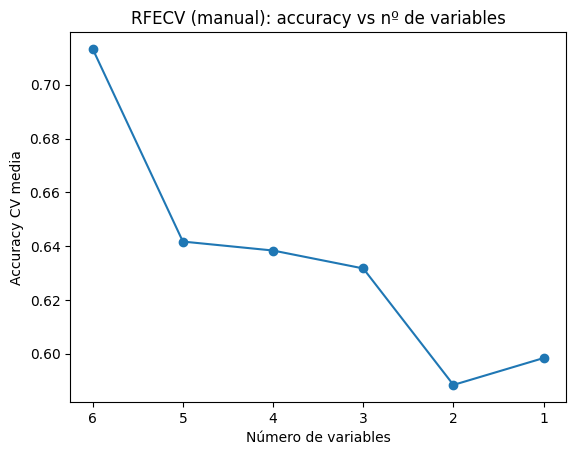

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# =========================================================
# RFECV "manual" para ver cada paso (usa X, y ya existentes)
# =========================================================
cv = 5
scoring = "accuracy"
model = LogisticRegression(max_iter=1000)

features = list(X.columns)
history = []
step = 1

print("\n=========== RFECV (manual) PASO A PASO ===========\n")

while True:
    # 1) Evaluar rendimiento con CV con el conjunto actual de variables
    scores = cross_val_score(model, X[features], y, cv=cv, scoring=scoring)
    mean_score = scores.mean()
    std_score = scores.std()

    # 2) Entrenar para decidir qué eliminar (usando coeficientes)
    model.fit(X[features], y)
    abs_coefs = np.abs(model.coef_[0])

    # Variable menos importante (menor |coef|)
    if len(features) > 1:
        idx_remove = int(np.argmin(abs_coefs))
        to_remove = features[idx_remove]
        remove_coef = abs_coefs[idx_remove]
    else:
        to_remove = None
        remove_coef = None

    # 3) Guardar historial del paso
    history.append({
        "paso": step,
        "n_features": len(features),
        "accuracy_cv_mean": mean_score,
        "accuracy_cv_std": std_score,
        "eliminada": to_remove,
        "|coef|_eliminada": remove_coef,
        "features": features.copy()
    })

    # 4) Mostrar el paso
    print(f"PASO {step}: n_features={len(features)} | "
          f"accuracy_cv={mean_score:.4f} ± {std_score:.4f}")
    print(f"  Variables: {features}")
    if to_remove is not None:
        print(f"  👉 Se elimina: {to_remove}  (|coef|={remove_coef:.6f})\n")
        features.remove(to_remove)
        step += 1
    else:
        print("  ✅ Solo queda 1 variable. Fin.\n")
        break

# =========================================================
# Tabla final de pasos
# =========================================================
df_hist = pd.DataFrame(history)

print("\n=========== TABLA RESUMEN ===========")
display(df_hist[["paso", "n_features", "accuracy_cv_mean", "accuracy_cv_std", "eliminada", "|coef|_eliminada"]])

# =========================================================
# Elegir el número óptimo (máxima media de CV)
# =========================================================
best_idx = df_hist["accuracy_cv_mean"].idxmax()
best = df_hist.loc[best_idx]

print("\n=========== RESULTADO (ÓPTIMO SEGÚN CV) ===========")
print(f"Mejor accuracy_cv_mean: {best['accuracy_cv_mean']:.4f}")
print(f"Nº óptimo de variables: {int(best['n_features'])}")
print("Variables óptimas:", best["features"])

# =========================================================
# Gráfica opcional: rendimiento vs nº de variables
# =========================================================
plt.figure()
plt.plot(df_hist["n_features"], df_hist["accuracy_cv_mean"], marker="o")
plt.xlabel("Número de variables")
plt.ylabel("Accuracy CV media")
plt.title("RFECV (manual): accuracy vs nº de variables")
plt.gca().invert_xaxis()  # para que se vea de muchas -> pocas
plt.show()


<h4>10.2.3 Métodos Embedded</h4>

In [8]:
import pandas as pd

# Cargar dataset
df = pd.read_csv('dataset_feature_embedded.csv')

X = df.drop(columns=["target"])
y = df["target"]

df.head()

,edad,ingresos,visitas,tiempo_web,ingresos_dup,visitas_dup,ruido1,ruido2,target
0,56,781.301829,28,10.657273,777.185228,28.811438,-0.221066,-0.435052,1
1,69,1833.076445,25,9.574324,1860.683262,24.615565,-0.660641,1.440322,1
2,46,3788.623308,31,4.447261,3870.375894,31.690302,-0.399823,-1.575405,1
3,32,1250.805703,20,12.545638,1245.747078,18.300517,0.535850,-0.247118,1
4,60,2006.945414,30,13.336914,2021.220216,29.845695,-0.339440,0.142302,1


<h4>10.2.3.1. Regularización L1 (Lasso)</h4>

In [121]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# IMPORTANTE: L1 en modelos lineales suele requerir escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression con L1
# C controla la fuerza de regularización:
#  - C pequeño => más regularización => más coeficientes a 0
    model_l1 = LogisticRegression(
        penalty="l1",
        solver="liblinear",
        C=0.2,
        max_iter=2000
    )

model_l1.fit(X_scaled, y)

coef = pd.Series(model_l1.coef_[0], index=X.columns)
coef_abs = coef.abs().sort_values(ascending=False)

seleccionadas = coef[coef != 0].index.tolist()
eliminadas = coef[coef == 0].index.tolist()

print("✅ Variables seleccionadas (coef != 0):", seleccionadas)
print("❌ Variables eliminadas (coef == 0):", eliminadas)

print("\nCoeficientes (|coef| desc):")
print(coef_abs)


✅ Variables seleccionadas (coef != 0): ['edad', 'visitas', 'tiempo_web', 'ingresos_dup']
❌ Variables eliminadas (coef == 0): ['ingresos', 'visitas_dup', 'ruido1', 'ruido2']

Coeficientes (|coef| desc):
ingresos_dup    0.520018
visitas         0.291835
tiempo_web      0.249463
edad            0.204675
ingresos        0.000000
visitas_dup     0.000000
ruido1          0.000000
ruido2          0.000000
dtype: float64


<h4>10.2.3.2. Arboles de Decisión</h4>

Importancia de variables con Random Forest (Embedded)

In [123]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1) Entrenar modelo (Embedded: la selección está "dentro" del entrenamiento)
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)

# 2) Importancias de variables
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("📌 Importancias (Random Forest):")
print(importancias)

# 3) Quedarse con las TOP-N variables (ejemplo: 5)
top_n = 5
top_features = importancias.head(top_n).index.tolist()

print(f"\n✅ Top-{top_n} variables seleccionadas:")
print(top_features)


📌 Importancias (Random Forest):
visitas_dup     0.148358
tiempo_web      0.145943
edad            0.134452
ingresos        0.128577
ingresos_dup    0.122278
ruido2          0.120024
ruido1          0.117142
visitas         0.083225
dtype: float64

✅ Top-5 variables seleccionadas:
['visitas_dup', 'tiempo_web', 'edad', 'ingresos', 'ingresos_dup']


Selección por umbral (eliminar las de baja importancia)

In [125]:
umbral = 0.05  # ejemplo: conservar solo las que aportan al menos un 5%
umbral = 0.1
seleccionadas = importancias[importancias >= umbral].index.tolist()
eliminadas = importancias[importancias < umbral].index.tolist()

print("\n✅ Variables conservadas (>= umbral):", seleccionadas)
print("❌ Variables eliminadas (< umbral):", eliminadas)



✅ Variables conservadas (>= umbral): ['visitas_dup', 'tiempo_web', 'edad', 'ingresos', 'ingresos_dup', 'ruido2', 'ruido1']
❌ Variables eliminadas (< umbral): ['visitas']


<h4>10.3 Importancia de Variables</h4>

<h4>10.3.1.1 Técnicas basadas en coeficientes de modelos lineales</h4>

1) Cargar datos y preparar train/test

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar dataset
df = pd.read_csv("dataset_feature_importance.csv")

# Ajusta si tu columna objetivo tiene otro nombre
X = df.drop(columns=["target"])
y = df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Escalado (importante para modelos lineales con regularización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
df.head()

,signal_1,signal_2,signal_3,signal_4,redundant_1,redundant_2,redundant_3,noise_1,noise_2,noise_3,noise_4,noise_5,target
0,1.340116,-0.696035,2.144436,-0.813550,-0.299015,0.526641,0.015501,-0.419010,1.579063,-1.734956,-1.278486,0.059138,1
1,-1.642097,-0.415894,-1.862828,0.708151,0.174461,0.413385,1.580239,0.168899,0.903945,0.544137,2.203006,-1.554612,1
2,-0.855013,-1.293372,-0.986226,0.364737,-0.413159,0.848432,1.444916,0.313289,-0.810091,0.001744,-2.325688,0.477364,1
3,-0.862673,-2.007840,-0.003455,-0.043892,-1.338135,-1.292563,-0.930788,-1.533284,-0.331080,0.024329,1.163654,1.747497,0
4,-1.431134,-1.067864,-0.850498,0.264281,0.025121,-2.107683,-1.727900,-1.669258,0.388423,1.055298,-0.434752,-0.501439,1


2) Entrenar un modelo lineal con L1 (sparse) y ver coeficientes

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    C=1.0,          # Más pequeño = más regularización = más coeficientes a 0
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

# Coeficientes del modelo
coefs = model.coef_.ravel()

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
}).sort_values(by="abs_coef", ascending=False)

print("Coeficientes del modelo (ordenados por importancia):")
print(coef_df)


Coeficientes del modelo (ordenados por importancia):
        feature      coef  abs_coef
6   redundant_3  1.069165  1.069165
0      signal_1  0.716177  0.716177
5   redundant_2 -0.387288  0.387288
7       noise_1  0.238448  0.238448
1      signal_2  0.147474  0.147474
4   redundant_1 -0.081830  0.081830
10      noise_4  0.060070  0.060070
11      noise_5 -0.013258  0.013258
3      signal_4  0.000000  0.000000
2      signal_3  0.000000  0.000000
9       noise_3  0.000000  0.000000
8       noise_2  0.000000  0.000000


<h4>10.3.1.2 Técnicas basadas en Reducción de impureza(Árboles)</h4>

Entrenar un Random Forest y obtener importancias

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Importancias basadas en reducción de impureza
importances = rf.feature_importances_

imp_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("Importancia de variables (basada en impureza):")
print(imp_df)


Importancia de variables (basada en impureza):
        feature  importance
5   redundant_2    0.188039
7       noise_1    0.145365
0      signal_1    0.123267
3      signal_4    0.116945
6   redundant_3    0.110744
9       noise_3    0.096434
2      signal_3    0.084290
11      noise_5    0.028184
1      signal_2    0.027652
8       noise_2    0.026798
10      noise_4    0.026263
4   redundant_1    0.026019


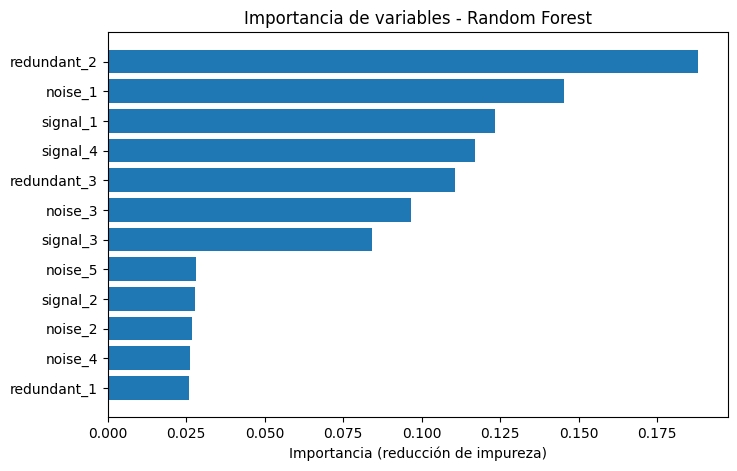

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(imp_df["feature"], imp_df["importance"])
plt.xlabel("Importancia (reducción de impureza)")
plt.title("Importancia de variables - Random Forest")
plt.gca().invert_yaxis()
plt.show()

<h4>10.3.2.1 Permutation Importante

Entreno un modelo con Regresión Logística

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

# Semilla para reproducibilidad
np.random.seed(42)

n = 1000

# Variables
signal_strong = np.random.randn(n)                # señal fuerte
signal_weak = 0.3 * np.random.randn(n)            # señal débil
noise = np.random.randn(n)                        # puro ruido

# Target depende sobre todo de signal_strong y un poco de signal_weak
logit = 3*signal_strong + 0.8*signal_weak
prob = 1 / (1 + np.exp(-logit))
y = (prob > 0.5).astype(int)

# Dataset
X = pd.DataFrame({
    "signal_strong": signal_strong,
    "signal_weak": signal_weak,
    "noise": noise
})

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Accuracy base
base_acc = accuracy_score(y_test, model.predict(X_test_scaled))
print("Accuracy base:", base_acc)




Accuracy base: 0.984


Calcular Permutation Importance

In [12]:
# Permutation Importance
result = permutation_importance(
    model,
    X_test_scaled,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="accuracy"
)

# Resultados
perm_df = pd.DataFrame({
    "feature": X.columns,
    "accuracy_drop_mean": result.importances_mean,
    "accuracy_drop_std": result.importances_std
}).sort_values(by="accuracy_drop_mean", ascending=False)

perm_df

,feature,accuracy_drop_mean,accuracy_drop_std
0,signal_strong,0.4868,0.034919
1,signal_weak,0.0208,0.007111
2,noise,-0.0008,0.001600


### 🧠 Interpretación de `importances_mean` y `importances_std`

- **mean alto + std pequeña**  
  Variable importante y medida fiable (impacto estable en la métrica).

- **mean alto + std grande**  
  Variable posiblemente importante, pero con impacto inestable; la estimación no es fiable.  
  Suele ocurrir con variables correlacionadas, pocos datos o modelos inestables.

- **mean bajo + std pequeña**  
  Variable irrelevante y medida estable.

**Regla mental:**  
- `mean` = cuánto importa  
- `std` = cuán fiable es esa medida


<h4>10.3.3.1 SHAP (SHapley Additive exPlanations)</h4>

🧪 1) Preparar datos y entrenar modelo

In [13]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# =========================================================
# 1) Dataset REALISTA
# =========================================================
rng = np.random.default_rng(42)
n = 800

df = pd.DataFrame({
    "ingresos": rng.normal(35000, 12000, n).clip(8000, 120000).round(0).astype(int),
    "visitas_web": rng.poisson(10, n).clip(0, 60).astype(int),
    "edad": rng.integers(18, 81, n).astype(int),
    "tiempo_web": rng.gamma(shape=2.0, scale=12.0, size=n).clip(0, 120).round(1),
    "ruido": rng.normal(0, 1, n).round(3)
})

logit = (
    0.00006 * (df["ingresos"] - 30000) +
    0.08 * (df["visitas_web"] - 8) +
    0.02 * (df["tiempo_web"] - 15) -
    0.01 * (df["edad"] - 40) +
    rng.normal(0, 0.6, n)
)

prob = 1 / (1 + np.exp(-logit))
df["target"] = (prob > 0.5).astype(int)

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# =========================================================
# 2) Modelo: Regresión Logística (NO árboles)
# =========================================================
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
print("Accuracy test:", accuracy_score(y_test, pipe.predict(X_test)))

Accuracy test: 0.815


🧠 2) Calcular SHAP

In [14]:
# =========================================================
# 3) SHAP (versión simple para modelos lineales)
# =========================================================

# Transformamos los datos con el scaler del pipeline
X_train_scaled = pipe.named_steps["scaler"].transform(X_train)
X_test_scaled = pipe.named_steps["scaler"].transform(X_test)

# Creamos el explicador lineal sobre el clasificador
explainer = shap.LinearExplainer(
    pipe.named_steps["clf"],   # el modelo (LogisticRegression)
    X_train_scaled             # datos de referencia
)

# Calculamos SHAP en test
shap_values = explainer.shap_values(X_test_scaled)
# shap_values tiene forma: (n_muestras, n_features)


In [15]:
#!pip install shap

Tabla de importancia global de variables con SHAP

In [18]:
# =========================================================
# 4) IMPORTANCIA GLOBAL (tabla)
# =========================================================
mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_global_importance = pd.DataFrame({
    "feature": X.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values("mean_abs_shap", ascending=False)

print("\n=== Importancia GLOBAL (media |SHAP|) ===")
print(shap_global_importance)


=== Importancia GLOBAL (media |SHAP|) ===
       feature  mean_abs_shap
0     ingresos       1.700559
1  visitas_web       0.788834
3   tiempo_web       0.639121
2         edad       0.471307
4        ruido       0.152547


Tabla de importancia LOCAL de variables con SHAP

In [21]:
# =========================================================
# 5) EXPLICACIÓN LOCAL (tabla) - CORREGIDA
# =========================================================
i = 0  # índice dentro del conjunto de test (0..len(X_test)-1)

# --- 5.1) Normalizar salida de shap_values según versión de SHAP ---
# En binaria, a veces shap devuelve una lista (una por clase).
# Nos quedamos con la clase positiva (1) si viene en lista.
if isinstance(shap_values, list):
    shap_vals = shap_values[1]  # clase positiva
else:
    shap_vals = shap_values      # ya es (n_samples, n_features)

# Base value (expected_value): puede ser escalar o array
base_value = explainer.expected_value
if isinstance(base_value, (list, np.ndarray)) and np.array(base_value).ndim > 0:
    # Si viene por clase, nos quedamos con la clase positiva
    base_value = np.array(base_value).ravel()
    if len(base_value) > 1:
        base_value = base_value[1]
    else:
        base_value = base_value[0]

# --- 5.2) Datos del ejemplo i ---
# Valores "originales" (sin escalar) para que el alumno lo entienda
x_row_original = X_test.iloc[i]

# Valores "escalados" (los que se han usado para calcular SHAP)
x_row_scaled = X_test_scaled[i]

# --- 5.3) Tabla local (SHAP por feature) ---
local_df = pd.DataFrame({
    "feature": X.columns,
    "valor_feature_original": x_row_original.values,  # sin escalar
    "valor_feature_scaled": x_row_scaled,             # escalado (lo que ve el modelo)
    "shap_value": shap_vals[i]
}).sort_values(by="shap_value", key=np.abs, ascending=False)

# --- 5.4) Reconstrucción de la predicción ---
# Para modelos lineales, SHAP suele reconstruir el "output" del modelo.
# En regresión logística, ese output es normalmente el LOGIT (log-odds).
logit_reconstruido = base_value + shap_vals[i].sum()

# Convertimos logit -> probabilidad con sigmoide para comparar con predict_proba
proba_reconstruida = 1 / (1 + np.exp(-logit_reconstruido))

# Predicción real del modelo (usando el pipeline completo, con escalado interno)
proba_modelo = pipe.predict_proba(X_test.iloc[[i]])[:, 1][0]

print(f"\n=== Explicación LOCAL (ejemplo i = {i}) ===")
print("Base value (logit):", base_value)
print("Suma SHAP (logit): ", shap_vals[i].sum())
print("Logit reconstruido:", logit_reconstruido)
print("Proba reconstruida:", proba_reconstruida)
print("Proba real modelo: ", proba_modelo)

print("\nDetalle por variable (ordenado por |SHAP|):")
print(local_df)



=== Explicación LOCAL (ejemplo i = 0) ===
Base value (logit): 1.842252046579107
Suma SHAP (logit):  -4.3048423176467345
Logit reconstruido: -2.4625902710676275
Proba reconstruida: 0.0785227084678388
Proba real modelo:  0.07852270846783883

Detalle por variable (ordenado por |SHAP|):
       feature  valor_feature_original  valor_feature_scaled  shap_value
0     ingresos               17067.000             -1.498748   -3.473582
1  visitas_web                   8.000             -0.610755   -0.561699
3   tiempo_web                  13.500             -0.615846   -0.479878
2         edad                  41.000             -0.281945    0.113126
4        ruido                   0.357              0.374073    0.097191


## 1️⃣ Summary Plot

### ¿Para qué sirve?
- Para tener una **visión global del modelo**.
- Responde a:  
  **¿Qué variables son las más importantes y cómo influyen en las predicciones?**
- Permite ver:
  - Qué variables dominan el modelo.
  - Si valores altos o bajos de una variable suben o bajan la predicción.
  - Si el efecto es lineal o no lineal.

### ¿Cómo se interpreta?
- Eje Y: variables ordenadas por importancia.
- Eje X: valor SHAP (impacto en la predicción).
- Cada punto es una muestra del dataset.
- Color:
  - Rojo = valor alto de la variable.
  - Azul = valor bajo.
- Si los puntos están a la derecha → la variable **aumenta** la predicción.
- Si están a la izquierda → la variable **disminuye** la predicción.
- Cuanto más dispersos estén los puntos, **más influencia** tiene la variable.

C:\Users\box\AppData\Local\Temp\ipykernel_14656\280422187.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns)


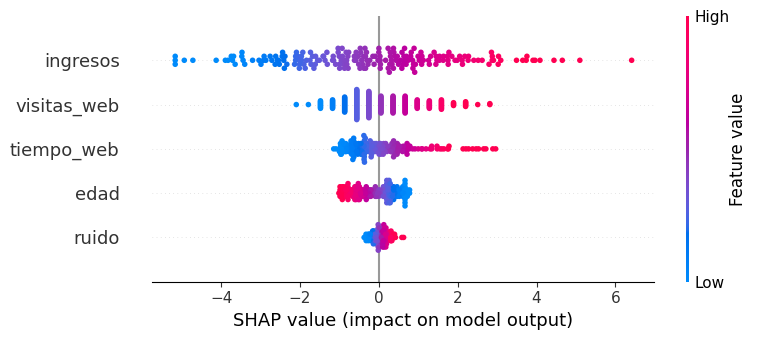

In [22]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


## 2️⃣ Bar Plot (Importancia global)

### ¿Para qué sirve?
- Para obtener un **ranking simple de importancia de variables**.
- Responde a:  
  **¿Qué variables son las más importantes en el modelo en general?**
- Es muy útil para:
  - Selección de variables.
  - Detectar variables irrelevantes o dominantes.

### ¿Cómo se interpreta?
- Cada barra representa la **media del valor absoluto de SHAP** de una variable.
- Cuanto más larga la barra, **más importante** es la variable.
- Las variables con barras muy pequeñas:
  - Apenas influyen en el modelo.
  - Son candidatas a eliminar.


C:\Users\box\AppData\Local\Temp\ipykernel_14656\1804177884.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)


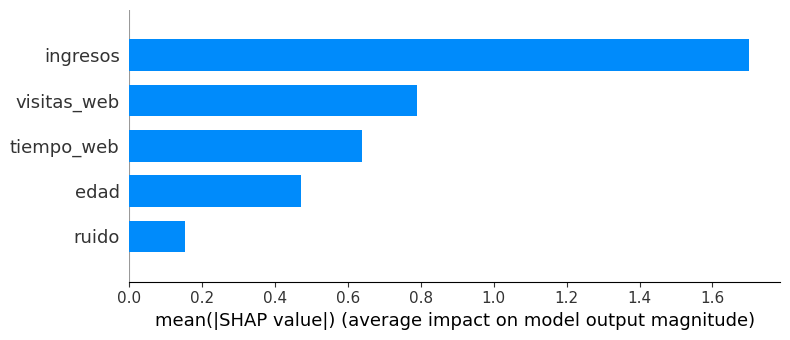

In [23]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)


Haciendolo yo manualmente:

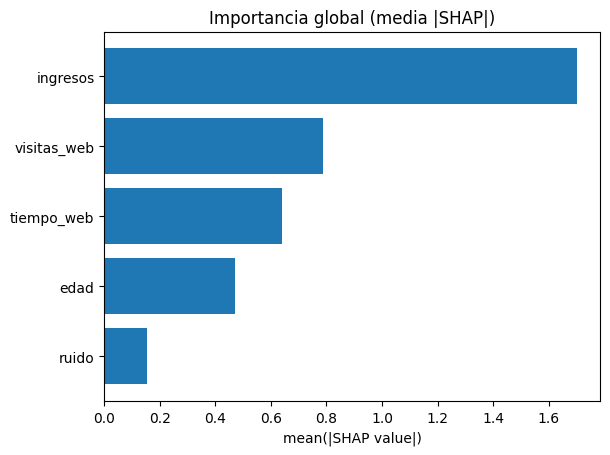

In [24]:
import matplotlib.pyplot as plt

plt.barh(shap_global_importance["feature"], shap_global_importance["mean_abs_shap"])
plt.xlabel("mean(|SHAP value|)")
plt.title("Importancia global (media |SHAP|)")
plt.gca().invert_yaxis()
plt.show()

##  (Explicación local de un individuo)


In [34]:
print(f"\n=== Explicación LOCAL (ejemplo i = {i}) ===")
print("Base value (logit):", base_value)
print("Suma SHAP (logit): ", shap_vals[i].sum())
print("Logit reconstruido:", logit_reconstruido)
print("Proba reconstruida:", proba_reconstruida)
print("Proba real modelo: ", proba_modelo)

print("\nDetalle por variable (ordenado por |SHAP|):")
print(local_df)


=== Explicación LOCAL (ejemplo i = 0) ===
Base value (logit): 1.842252046579107
Suma SHAP (logit):  -4.3048423176467345
Logit reconstruido: -2.4625902710676275
Proba reconstruida: 0.0785227084678388
Proba real modelo:  0.07852270846783883

Detalle por variable (ordenado por |SHAP|):
       feature  valor_feature_original  valor_feature_scaled  shap_value  \
0     ingresos               17067.000             -1.498748   -3.473582   
1  visitas_web                   8.000             -0.610755   -0.561699   
3   tiempo_web                  13.500             -0.615846   -0.479878   
2         edad                  41.000             -0.281945    0.113126   
4        ruido                   0.357              0.374073    0.097191   

      contribucion   impacto  
0   ↓ reduce proba  3.473582  
1   ↓ reduce proba  0.561699  
3   ↓ reduce proba  0.479878  
2  ↑ aumenta proba  0.113126  
4  ↑ aumenta proba  0.097191  


- **Base value (logit): 1.8422**  
  Es el **punto de partida** de SHAP: el **logit medio** (salida típica del modelo) calculado con el conjunto de referencia (*background*) que diste al explicador (en tu caso, `X_train_scaled`).  
  Es “lo que el modelo diría para un caso promedio” antes de ver el ejemplo concreto.

- **Suma SHAP (logit): −4.3048**  
  Es la **suma de las contribuciones SHAP** de todas las variables del ejemplo.  
  Representa el **cambio total** respecto al base value.  
  Al ser negativa, significa: “las variables empujan la predicción hacia abajo (hacia clase 0)”.

- **Logit reconstruido: −2.4626**  
  Se obtiene con:  
  `logit_reconstruido = base_value + sum(shap_values)`  
  Numéricamente:  
  `-2.4626 ≈ 1.8422 + (-4.3048)`  
  Es la **salida final del modelo** en escala **logit (log-odds)**, antes de convertir a probabilidad.

- **Proba reconstruida: 0.07852**  
  Es la probabilidad al aplicar la sigmoide al logit reconstruido:  
  `p = 1 / (1 + exp(-logit_reconstruido))`  
  Como el logit es negativo (−2.46), la probabilidad sale baja (~7.85%).

- **Proba real modelo: 0.07852**  
  Es la probabilidad que devuelve el modelo con `pipe.predict_proba(...)`.  
  Coincide con la reconstruida porque SHAP (en modelos lineales) **reconstruye exactamente** el logit y, al aplicar la sigmoide, obtienes la misma probabilidad.

**Resumen mental:**  
Empiezas en el “promedio” (**base logit 1.84**) → las variables del ejemplo restan (**−4.30**) → llegas a **logit −2.46** → lo conviertes a probabilidad → **0.0785**.


**Baseline (en SHAP)** = el **valor de referencia “típico”** con el que SHAP compara un ejemplo para medir si cada variable **aporta** positiva o negativamente.

**Cómo se calcula (en tu caso):**
- Le pasas a SHAP un *background dataset*: `X_train_scaled`.
- El baseline por variable suele ser la **media de esa variable** en el background:

  `baseline_j = mean(X_train_scaled[:, j])`

**Nota:** si usas `StandardScaler`, esas medias suelen ser **≈ 0**, porque el escalado centra los datos.

**Resumen:**
- Baseline = “valores promedio” de las variables en el train (background).
- Se usa como punto de referencia para calcular las contribuciones SHAP.


In [41]:
import pandas as pd

feature_names = list(X.columns)

baseline_df = pd.DataFrame({
    "feature": feature_names,
    "baseline_original_mean": X_train.mean(axis=0).values,
    "baseline_scaled_mean": X_train_scaled.mean(axis=0)
})

print(baseline_df)


       feature  baseline_original_mean  baseline_scaled_mean
0     ingresos            34807.611667          2.235249e-16
1  visitas_web                9.926667          2.546111e-16
2         edad               46.140000         -4.144833e-17
3   tiempo_web               23.672000         -3.108624e-17
4        ruido               -0.011213         -5.921189e-18


## ¿Qué es un valor SHAP?

Un **valor SHAP** de una variable indica **cuánto contribuye esa variable** a mover la predicción del modelo **desde el valor base (base value)** hasta la predicción final **para un ejemplo concreto**.

En tu caso (Regresión Logística), SHAP está explicando el **logit (log-odds)**:

- `logit_predicho = base_value (logit) + suma(shap_values)`
- Cada `shap_value` es un “empujón” en logit:
  - **SHAP > 0** → empuja hacia **clase 1** (sube la probabilidad)
  - **SHAP < 0** → empuja hacia **clase 0** (baja la probabilidad)

---

## ¿Cómo se calcula en un modelo lineal (tu caso)?

En un modelo lineal, el SHAP de una variable `j` se puede entender como:

`SHAP_j ≈ w_j * (x_j - baseline_j)`

donde:
- `w_j` = coeficiente (peso) del modelo para esa variable  
- `x_j` = valor de la variable en el ejemplo  
- `baseline_j` = valor “típico” (referencia) de esa variable en el background (normalmente la media del train)

Como tú usas `StandardScaler` y el background es `X_train_scaled`, normalmente:

- `baseline_j ≈ 0` en el espacio escalado

y entonces queda (intuición muy útil):

`SHAP_j ≈ w_j * x_j_scaled`

---

## Ejemplo con la variable **ingresos** (tu ejemplo i = 0)

De tu tabla:

- `ingresos (original) = 17067`
- `ingresos (scaled) = -1.498748`
- `SHAP(ingresos) = -3.473582`

### Interpretación
1) `x_scaled` es **negativo** → significa que **17067 está por debajo de la media** del train (aprox 1.5 desviaciones típicas por debajo).

2) El modelo aprendió que **más ingresos** suelen aumentar la probabilidad de clase 1 (coeficiente positivo).  
   Por tanto, estar por debajo de la media **resta** → SHAP sale **negativo**.

3) Ese `-3.47` es un empujón muy fuerte hacia clase 0 y es la principal razón por la que la probabilidad final cae a ~0.078.

---

## “Cálculo” didáctico aproximado
Si el baseline escalado de ingresos es ~0:

`SHAP_ingresos ≈ w_ingresos * (-1.4987) = -3.4736`

Esto sugiere aproximadamente:

`w_ingresos ≈ (-3.4736) / (-1.4987) ≈ 2.32`

(En modelos lineales suele cuadrar muy bien.)




In [43]:
idx = list(X.columns).index("ingresos")

w_ing = pipe.named_steps["clf"].coef_[0, idx]
x_ing_scaled = X_test_scaled[0, idx]

# baseline aproximado (media del train escalado)
baseline_ing = X_train_scaled[:, idx].mean()

shap_aprox = w_ing * (x_ing_scaled - baseline_ing)

print("w_ingresos:", w_ing)
print("x_ing_scaled:", x_ing_scaled)
print("baseline_ing_scaled:", baseline_ing)
print("SHAP aproximado:", shap_aprox)
print("SHAP real:", shap_vals[0, idx])


w_ingresos: 2.212375346029957
x_ing_scaled: -1.4987477331408623
baseline_ing_scaled: 2.2352490229119817e-16
SHAP aproximado: -3.315792534719129
SHAP real: -3.473582246700971


## Pesos variables


In [44]:
coef = pipe.named_steps["clf"].coef_[0]          # pesos (uno por feature)
features = X.columns

pesos_df = pd.DataFrame({"feature": features, "peso": coef}).sort_values("peso")
print(pesos_df)


       feature      peso
2         edad -0.527453
4        ruido  0.181053
3   tiempo_web  0.853840
1  visitas_web  0.968260
0     ingresos  2.212375


## 3️⃣ Waterfall Plot (Explicación local de un individuo)

### ¿Para qué sirve?
- Para explicar **una predicción concreta**.
- Responde a:  
  **¿Por qué este ejemplo específico ha obtenido esta predicción?**
- Se usa para:
  - Justificar decisiones individuales.
  - Analizar casos concretos.
  - Entender qué variables han sido decisivas en un ejemplo.

### ¿Cómo se interpreta?
- Se parte del **valor base** (predicción media del modelo).
- Cada variable:
  - Suma si empuja la predicción hacia arriba.
  - Resta si empuja la predicción hacia abajo.
- La suma de todos los aportes lleva a la **predicción final**.
- Las barras más grandes indican las variables **más influyentes en ese caso**

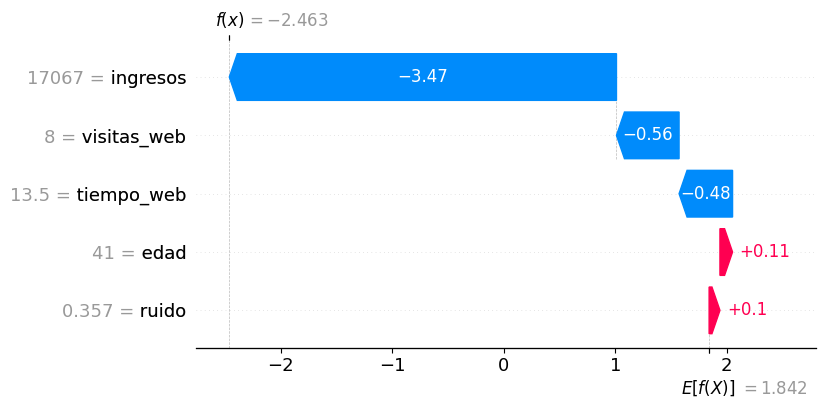

In [35]:
i = 0  # índice del ejemplo que quieres explicar

exp_one = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=X_test.iloc[i].values,
    feature_names=X.columns.tolist()
)

shap.plots.waterfall(exp_one)


## 📊 Explicación del Waterfall Plot (SHAP) — Caso individual

Este gráfico muestra **cómo el modelo construye la predicción de un individuo concreto** a partir de la predicción media del modelo.

### 🔢 Elementos clave del gráfico

- **E[f(X)] = 1.842**  
  Es la **predicción media del modelo** (valor base). Representa lo que el modelo predice “de media” para cualquier individuo.

- **f(x) = -2.463**  
  Es la **predicción final del modelo para este individuo concreto** (en la escala interna del modelo, por ejemplo log-odds en regresión logística).

- Cada barra representa la **contribución SHAP de una variable**:
  - 🔵 Azul: la variable **reduce** la predicción
  - 🔴 Rojo: la variable **aumenta** la predicción
  - El tamaño de la barra indica **cuán fuerte** es su impacto

---

### 🧠 Interpretación variable a variable

- **ingresos = 17067 → SHAP = -3.47**  
  Es el factor más influyente.  
  Un nivel de ingresos relativamente bajo **reduce fuertemente** la predicción del modelo.

- **visitas_web = 8 → SHAP = -0.56**  
  Un número moderado/bajo de visitas **reduce** la probabilidad de la clase positiva.

- **tiempo_web = 13.5 → SHAP = -0.48**  
  Pasar poco tiempo en la web también **empuja la predicción hacia abajo**.

- **edad = 41 → SHAP = +0.11**  
  La edad en este caso **aumenta ligeramente** la predicción, pero su efecto es pequeño.

- **ruido = 0.357 → SHAP = +0.10**  
  Esta variable apenas influye y **solo incrementa muy poco** la predicción.


## 🧮 Cómo se obtiene la predicción con SHAP (con valores reales)

La predicción del modelo se descompone así:

f(x) = E[f(X)] + SHAP_ingresos + SHAP_visitas_web + SHAP_tiempo_web + SHAP_edad + SHAP_ruido

Donde:
- E[f(X)] es la predicción media del modelo (valor base)
- Cada SHAP_variable es la contribución de esa variable para este individuo

---

### 🧠 Interpretación 

- Partimos de una predicción media **positiva** (1.842)
- Los ingresos bajos restan **muchísimo**
- Las pocas visitas y poco tiempo en la web también restan
- La edad y el ruido suman un poco, pero **no compensan**
- El resultado final es una predicción **claramente baja**: **−2.463**

---

### 🏁 Conclusión 

> Para este individuo, los ingresos bajos, pocas visitas y poco tiempo en la web empujan fuertemente la predicción hacia la clase negativa. Aunque la edad y el ruido suman un poco, su efecto es pequeño y no compensa los factores negativos, por lo que el modelo acaba prediciendo un valor claramente bajo.


## 4️⃣ Dependence Plot

### ¿Para qué sirve?
- Para analizar **cómo cambia la predicción según el valor de una variable**.
- Responde a:  
  **¿Qué efecto tiene esta variable cuando toma valores bajos o altos?**
- Se usa para:
  - Detectar relaciones no lineales.
  - Encontrar umbrales o saturaciones.
  - Entender reglas internas del modelo.

### ¿Cómo se interpreta?
- Eje X: valor real de la variable.
- Eje Y: valor SHAP (impacto en la predicción).
- Cada punto es una muestra.
- Si al aumentar X los puntos suben:
  - Valores altos de la variable **aumentan** la predicción.
- Si bajan:
  - Valores altos de la variable **disminuyen** la predicción.
- Patrones curvos o cambios bruscos indican **efectos no lineales**.

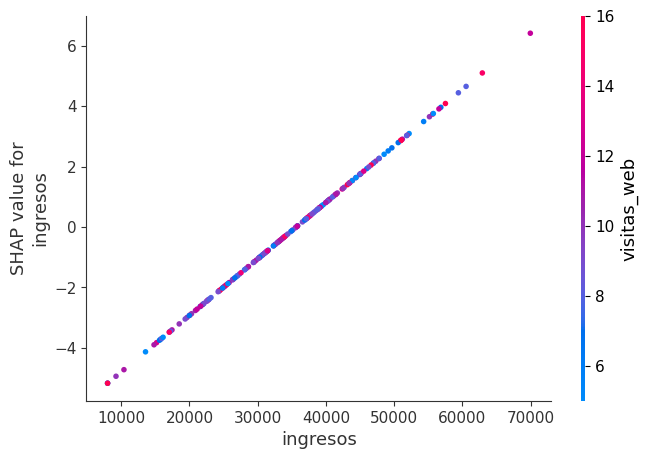

In [82]:
shap.dependence_plot(
    "ingresos",
    shap_values,
    X_test,
    feature_names=X.columns
)


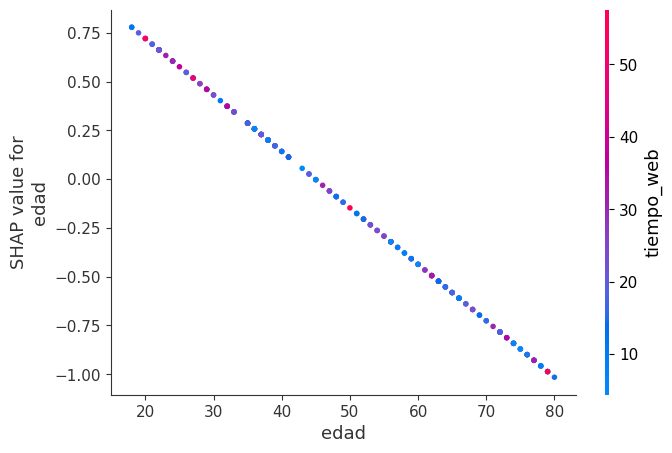

In [85]:
shap.dependence_plot(
    "edad",
    shap_values,
    X_test,
    interaction_index="tiempo_web",
    feature_names=X.columns
)

## 📈 Interpretación del Dependence Plot de `ingresos`

Este gráfico muestra **cómo cambia el impacto de `ingresos` en la predicción del modelo según su valor**.

### 🧭 Ejes del gráfico

- **Eje X**: valor real de `ingresos` (en euros)
- **Eje Y**: valor SHAP de `ingresos`  
  → Es decir, **cuánto sube o baja la predicción del modelo debido a `ingresos`**

Cada punto representa **un individuo del dataset**.

---

### 🎨 ¿Por qué aparece `visitas_web` en colores?

El color de cada punto representa **otra variable**, en este caso: `visitas_web`.

SHAP lo hace automáticamente para mostrar **posibles interacciones** entre variables.

- 🔵 Azul: pocos `visitas_web`
- 🔴 Rojo: muchos `visitas_web`

Esto permite ver si:
> El efecto de `ingresos` cambia según el número de visitas a la web.

En este gráfico, los colores están bastante mezclados, lo que indica que:
> El efecto de `ingresos` es bastante independiente de `visitas_web` (no hay una interacción fuerte).

---

### 📊 Forma del gráfico

Se observa una **línea casi perfectamente recta y creciente**:

- Ingresos bajos → SHAP negativo → **bajan la predicción**
- Ingresos altos → SHAP positivo → **suben la predicción**

Esto indica que:
> El modelo ha aprendido una relación casi lineal: cuanto mayores son los ingresos, mayor es la predicción del resultado positivo.

Esto es coherente con que estés usando una **regresión logística (modelo lineal)**.

---

### 🧠 Interpretación en lenguaje sencillo

- `ingresos` tiene un efecto **fuerte y monotónico** en la predicción:
  - Más ingresos → mayor probabilidad de clase positiva
  - Menos ingresos → menor probabilidad
- El color (`visitas_web`) muestra que **no hay una interacción fuerte** entre ambas variables en este modelo.
- El impacto de `ingresos` es **consistente y predecible** en todo su rango.

---

### 📝 Conclusion

> El dependence plot muestra que el impacto de los ingresos en la predicción es casi perfectamente lineal: a mayor ingreso, mayor contribución positiva al modelo, y este efecto apenas depende del número de visitas a la web.

---

### ℹ️ Nota técnica

SHAP elige automáticamente la variable de color (aquí `visitas_web`) porque es la que **más interacción potencial** tiene con `ingresos`, aunque en este caso la interacción sea pequeña.



<h2>11. Reducción de la Dimensionalidad</h2>

In [25]:
import pandas as pd
import numpy as np

# Cargar dataset desde CSV
df = pd.read_csv("dataset_reduccion_dimensionalidad.csv")

# Separar variables y target
X = df.drop(columns="target")
y = df["target"]

df.head()



,edad,ingresos,visitas,tiempo_web,ingresos_dup,visitas_dup,ruido1,ruido2,target
0,56,781.301829,28,10.657273,777.185228,28.811438,-0.221066,-0.435052,1
1,69,1833.076445,25,9.574324,1860.683262,24.615565,-0.660641,1.440322,1
2,46,3788.623308,31,4.447261,3870.375894,31.690302,-0.399823,-1.575405,1
3,32,1250.805703,20,12.545638,1245.747078,18.300517,0.535850,-0.247118,1
4,60,2006.945414,30,13.336914,2021.220216,29.845695,-0.339440,0.142302,1


<h4>11.2.1.1 PCA — Principal Component Analysis</h4>

Aplicar PCA (reducción a 2 dimensiones)

In [26]:
from sklearn.decomposition import PCA

# Creamos PCA para reducir a 2 componentes
pca = PCA(n_components=2, random_state=42)

# Escalar
X_scaled = StandardScaler().fit_transform(X)

# Transformamos los datos
X_pca = pca.fit_transform(X_scaled)

print("Shape original:", X.shape)
print("Shape tras PCA:", X_pca.shape)


Shape original: (800, 8)
Shape tras PCA: (800, 2)


Ver los pesos de cada Componente

In [27]:
import pandas as pd

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns
)

loadings


,PC1,PC2
edad,0.021130,0.015345
ingresos,0.610770,-0.352523
visitas,0.354488,0.611343
tiempo_web,0.009432,-0.008120
ingresos_dup,0.610728,-0.352623
visitas_dup,0.352335,0.612786
ruido1,0.055234,-0.042434
ruido2,-0.024142,-0.005965


Aplicar PCA (reducción a 2 dimensiones)

In [29]:
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza explicada acumulada:")
print(pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente:
[0.25532709 0.23668703]

Varianza explicada acumulada:
0.4920141128073448


Visualizar el resultado de PCA (para entenderlo)

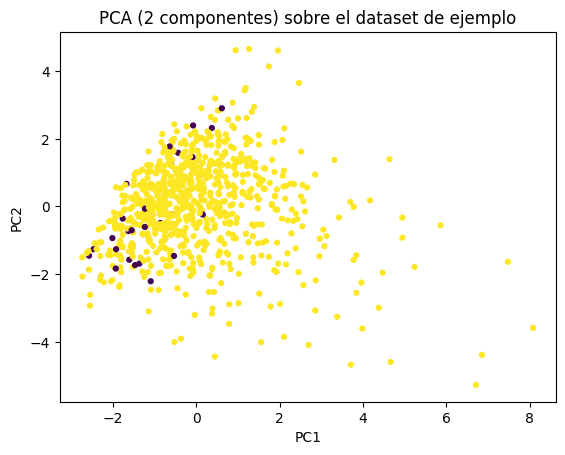

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=12)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 componentes) sobre el dataset de ejemplo")
plt.show()


Metodo Eleccion 1: Elegir el número de componentes según la varianza

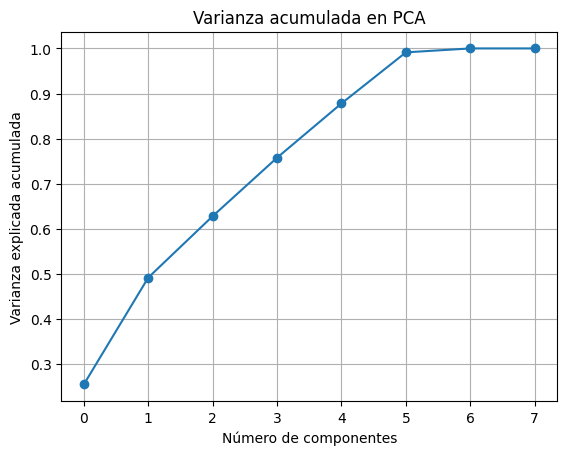

In [33]:

# PCA completo (todas las componentes)
pca_full = PCA()
pca_full.fit(X_scaled)

varianza_acumulada = pca_full.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(varianza_acumulada, marker="o")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza acumulada en PCA")
plt.grid(True)
plt.show()


Regla práctica clásica:

90% o 95% de varianza explicada

👉 Te quedas con el mínimo número de componentes que alcanza ese porcentaje.

Metodo Eleccion 2: Método del Codo (Elbow Method)

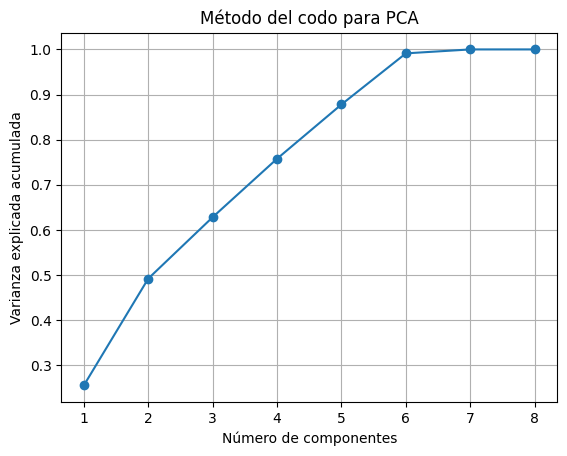

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA con todas las componentes
pca = PCA()
pca.fit(X_scaled)

# Varianza explicada acumulada
varianza_acumulada = pca.explained_variance_ratio_.cumsum()

# Gráfico del método del codo
plt.figure()
plt.plot(
    range(1, len(varianza_acumulada) + 1),
    varianza_acumulada,
    marker="o"
)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Método del codo para PCA")
plt.grid(True)
plt.show()


### 📉 Método del codo (*Elbow Method*) para PCA

**¿Qué busca?**  
Ver a partir de cuántos componentes añadir más ya no aporta información relevante.

**Busca:**
- Un cambio claro de pendiente  
- El “codo” de la curva  

---

**Ejemplo típico de varianza explicada:**

- Componente 1 → 40%  
- Componente 2 → 65%  
- Componente 3 → 80%  
- Componente 4 → 85%  
- Componente 5 → 88%  

👉 **El codo suele estar en 3 o 4 componentes.**


<h4>11.2.1.2 LDA — Linear Discriminant Analysis</h4>

Crear datos sencillos

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# Clase 0 (suspensos)
x1_0 = np.random.normal(3, 0.5, 50)   # pocas horas
x2_0 = np.random.normal(4, 0.5, 50)   # baja nota

# Clase 1 (aprobados)
x1_1 = np.random.normal(7, 0.5, 50)   # muchas horas
x2_1 = np.random.normal(8, 0.5, 50)   # buena nota

X = np.vstack([
    np.column_stack([x1_0, x2_0]),
    np.column_stack([x1_1, x2_1])
])

y = np.array([0]*50 + [1]*50)

df = pd.DataFrame(X, columns=["horas_estudio", "nota_examen"])
df["target"] = y


Visualizar los datos originales

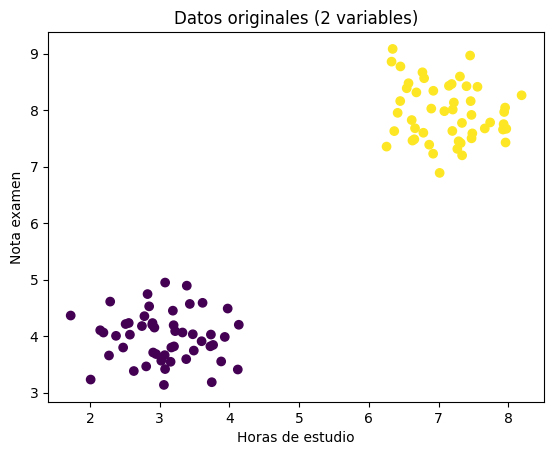

In [9]:
plt.figure()
plt.scatter(df["horas_estudio"], df["nota_examen"], c=df["target"])
plt.xlabel("Horas de estudio")
plt.ylabel("Nota examen")
plt.title("Datos originales (2 variables)")
plt.show()


Aplicar LDA

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = df[["horas_estudio", "nota_examen"]]
y = df["target"]

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

print("Forma de los datos tras LDA:", X_lda.shape)


Forma de los datos tras LDA: (100, 1)


Visualizar el resultado de LDA

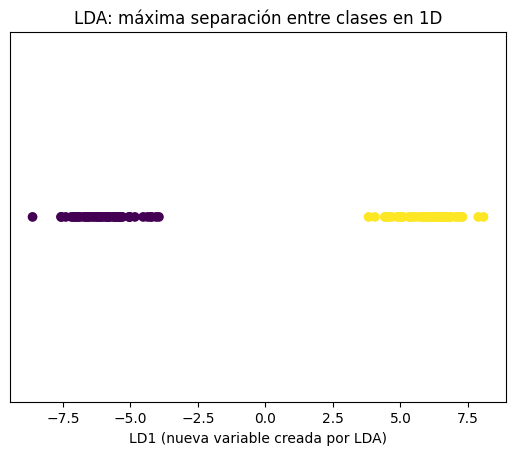

In [11]:
plt.figure()
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y)
plt.xlabel("LD1 (nueva variable creada por LDA)")
plt.yticks([])
plt.title("LDA: máxima separación entre clases en 1D")
plt.show()


<h4>11.2.2.1 Kernel PCA </h4>

Paso1️⃣ Kernel PCA

Text(0, 0.5, '$x_2$')

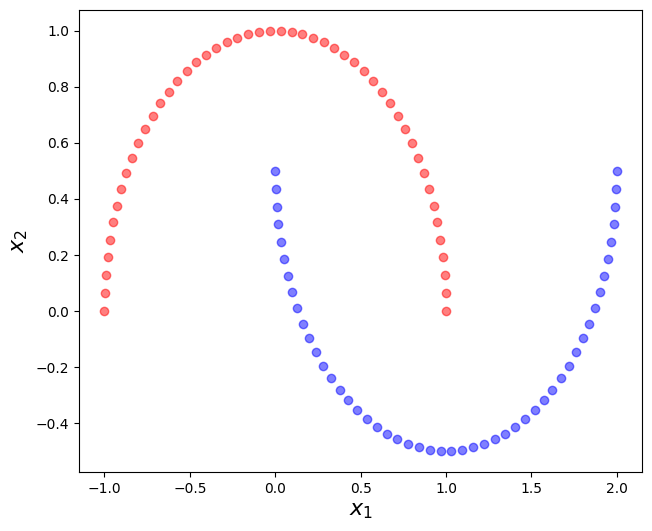

In [68]:
#Ejemplo de Kernel PCA
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

x, y = make_moons (n_samples = 100, random_state = 123)
# Datos
XKPCA = KernelPCA (n_components = 2, kernel = 'rbf', gamma = 15). fit_transform (x)

plt.figure (figsize = (16, 6))

# figure 1
plt.subplot (1, 2, 1)
plt.scatter (x [y == 0, 0], x [y == 0, 1], color = 'red', alpha = 0.5)
plt.scatter (x [y == 1, 0], x [y == 1, 1], color = 'blue', alpha = 0.5)

plt.xlabel ("$x_1$", fontsize = 16)
plt.ylabel ("$x_2$", fontsize = 16)

Paso 2️⃣ PCA normal (para comparar)

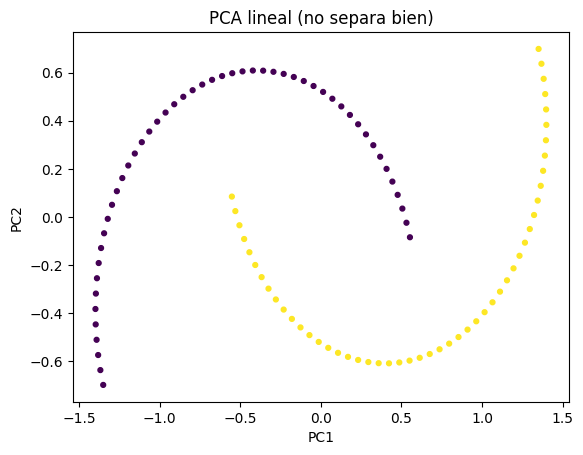

In [59]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(x)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=12)
plt.title("PCA lineal (no separa bien)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Paso 3️⃣ Visualizacion Kernel PCA 

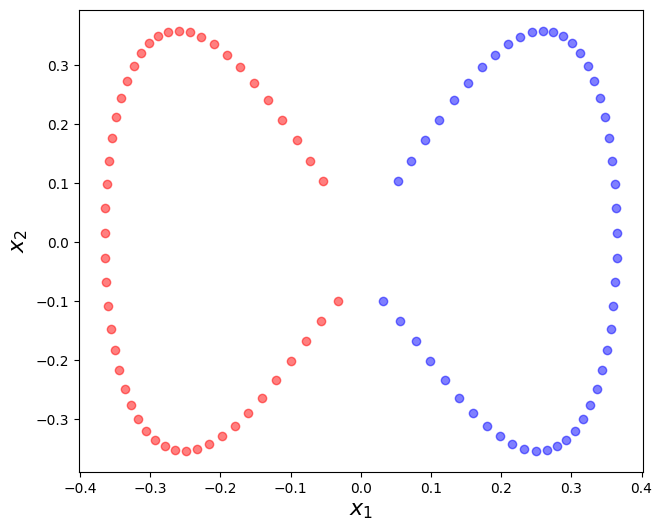

In [57]:
#Ejemplo de Kernel PCA
plt.figure (figsize = (16, 6))

# figure 2
plt.subplot (1, 2, 2)
plt.scatter (XKPCA [y == 0, 0], XKPCA [y == 0, 1], color = 'red', alpha = 0.5)
plt.scatter (XKPCA [y == 1, 0], XKPCA [y == 1, 1], color = 'blue', alpha = 0.5)

plt.xlabel ("$x_1$", fontsize = 16)
plt.ylabel ("$x_2$", fontsize = 16)

plt.show ()

<h4>11.2.2.2 t-SNE</h4>

📌 ANTES (datos originales escalados en 8D):
         x1        x2        x3        x4        x5        x6        x7  \
0 -0.290878 -0.867175  0.285687 -1.340040 -0.346411  0.203520 -0.771785   
1  1.228744  0.273563 -1.642413  1.771709  1.071648  1.855326 -0.510911   
2 -1.137966 -1.087990  0.087166 -1.133747  0.281597 -1.238930  0.300816   
3  1.737429 -0.285887 -1.795247  0.812025  1.570346  0.097433 -0.120831   
4 -1.859126 -1.082610  0.543694 -1.662103 -0.124290 -0.144198  0.087601   
5  1.039068 -0.316377 -1.396390  1.270125  0.441382  1.042465 -0.258501   
6 -1.478299 -1.268680 -0.596855 -1.086851  0.171147 -1.803685  1.194045   
7 -0.141738  0.697266 -1.181437  1.311586  1.346267 -0.591731  0.450254   

         x8  target  
0 -0.442547       2  
1 -0.278615       1  
2 -0.778365       2  
3 -1.013938       1  
4 -0.607525       2  
5 -1.302189       1  
6 -0.083818       2  
7 -1.002759       1  

📌 DESPUÉS (coordenadas del mapa t-SNE en 2D):
      tsne_1     tsne_2  target
0  

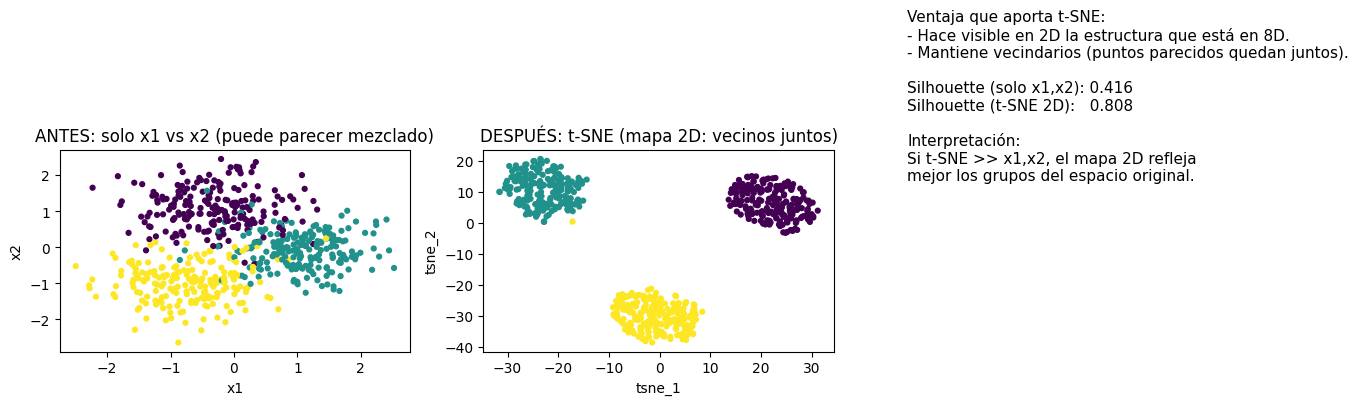

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# ----------------------------
# 1) Dataset "claro" en 8D
# ----------------------------
# 3 grupos en 8 dimensiones, luego escalamos.
X, y = make_blobs(
    n_samples=600,
    centers=3,
    n_features=8,
    cluster_std=2.2,
    random_state=42
)

X_scaled = StandardScaler().fit_transform(X)

cols = [f"x{i}" for i in range(1, 9)]
df_original = pd.DataFrame(X_scaled, columns=cols)
df_original["target"] = y

print("📌 ANTES (datos originales escalados en 8D):")
print(df_original.head(8))

# ----------------------------
# 2) Visualización "ingenua"
#    (solo 2 variables originales)
# ----------------------------
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_original["x1"], df_original["x2"], c=y, s=12)
plt.title("ANTES: solo x1 vs x2 (puede parecer mezclado)")
plt.xlabel("x1"); plt.ylabel("x2")

# ----------------------------
# 3) t-SNE → mapa 2D
# ----------------------------
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=42
)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=["tsne_1", "tsne_2"])
df_tsne["target"] = y

print("\n📌 DESPUÉS (coordenadas del mapa t-SNE en 2D):")
print(df_tsne.head(8))

# ----------------------------
# 4) Visualización del mapa t-SNE
# ----------------------------
plt.subplot(1, 3, 2)
plt.scatter(df_tsne["tsne_1"], df_tsne["tsne_2"], c=y, s=12)
plt.title("DESPUÉS: t-SNE (mapa 2D: vecinos juntos)")
plt.xlabel("tsne_1"); plt.ylabel("tsne_2")

# ----------------------------
# 5) Ventaja cuantificada (muy simple)
#    Silhouette: mayor => grupos más separados
# ----------------------------
# OJO: silhouette se calcula sobre coordenadas; aquí se usa solo como evidencia didáctica.
sil_x1x2 = silhouette_score(df_original[["x1", "x2"]], y)
sil_tsne = silhouette_score(df_tsne[["tsne_1", "tsne_2"]], y)

# Panel 3: texto resumen + comparación numérica
plt.subplot(1, 3, 3)
plt.axis("off")
plt.text(
    0.0, 0.85,
    "Ventaja que aporta t-SNE:\n"
    "- Hace visible en 2D la estructura que está en 8D.\n"
    "- Mantiene vecindarios (puntos parecidos quedan juntos).\n\n"
    f"Silhouette (solo x1,x2): {sil_x1x2:.3f}\n"
    f"Silhouette (t-SNE 2D):   {sil_tsne:.3f}\n\n"
    "Interpretación:\n"
    "Si t-SNE >> x1,x2, el mapa 2D refleja\n"
    "mejor los grupos del espacio original.",
    fontsize=11
)

plt.tight_layout()
plt.show()


<h4>11.2.2.3 UMAP</h4>

In [75]:
#!pip install umap-learn

📌 ANTES: dataset original (8 variables) — primeras filas
         x1        x2        x3        x4        x5        x6        x7  \
0 -0.187337  0.665386  1.079500 -0.239650 -1.168897  0.569577  0.600327   
1 -1.859461  2.862645  1.476718  0.014922 -1.239611  0.196301 -0.283175   
2 -0.064893  0.127659 -1.949373  1.135809  1.765067 -0.596713 -0.618018   
3  0.658279 -1.258976 -1.309044  0.988328  1.234285 -0.349209  1.466921   
4 -0.663060 -0.291305  0.110036 -0.743484 -0.183267 -0.238596  0.260118   
5  0.076387 -0.605090 -0.912099  0.719459  1.162714 -1.012283  0.777887   
6  1.080030 -0.068595 -1.545468  1.661463  1.247319 -0.205203  0.905365   
7 -0.321536  0.799810 -1.135991  1.301494  1.367763 -0.669341  0.467010   

         x8  target  
0  0.724633       0  
1  1.475255       0  
2 -0.570992       1  
3 -1.637578       1  
4 -0.016779       2  
5 -1.366865       1  
6 -1.073896       1  
7 -0.982240       1  

Shape: (900, 9)

📌 DESPUÉS: t-SNE (2 coordenadas) — primeras filas
 

C:\Users\box\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\box\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



📌 DESPUÉS: UMAP (2 coordenadas) — primeras filas
      umap_1     umap_2  target
0   0.400840  -4.910783       0
1  -0.851189  -5.009946       0
2  15.001589   4.547315       1
3  14.227321   5.577977       1
4   1.478680  12.970750       2
5  15.019337   5.933509       1
6  14.360339   5.952518       1
7  14.471076   5.944052       1


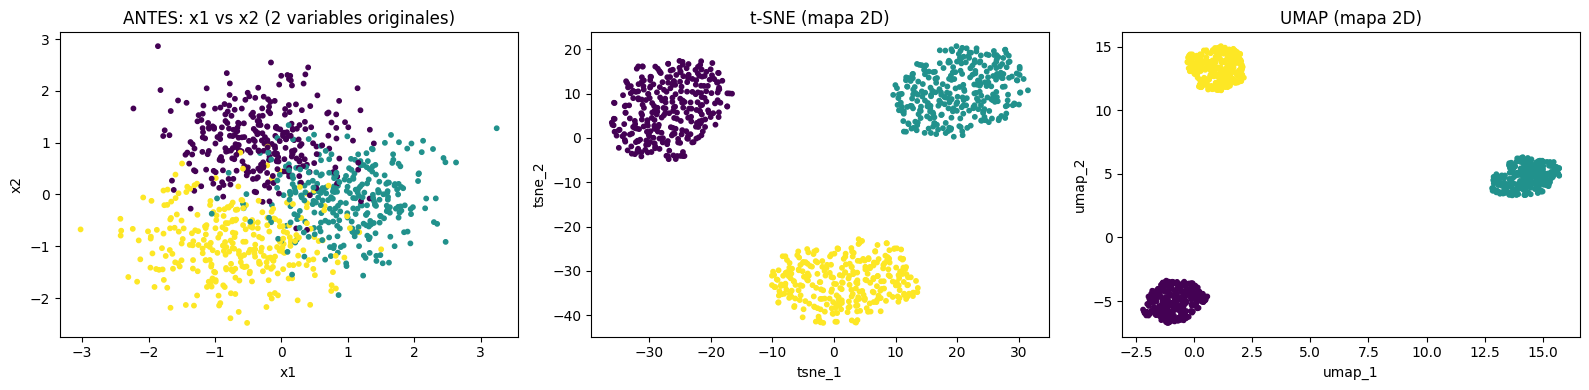


📌 Comparativa numérica (silhouette, cuanto mayor mejor en 2D):
Silhouette usando solo x1,x2: 0.335
Silhouette usando t-SNE 2D:    0.784
Silhouette usando UMAP 2D:    0.913

✅ Interpretación rápida:
- x1,x2 puede no mostrar bien la estructura (porque el patrón está en 8D).
- t-SNE/UMAP suelen mostrar mejor los grupos al preservar vecindarios.
- OJO: esto es para visualizar/analizar; no es 'crear variables interpretables'.


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# -------------------------------------------------
# 1) "Datos reales" simulados (tipo realista): 8D
#    3 grupos con ruido -> típico caso de alta dimensión
# -------------------------------------------------
X, y = make_blobs(
    n_samples=900,
    centers=3,
    n_features=8,
    cluster_std=2.6,
    random_state=42
)

# Escalado (recomendado para t-SNE/UMAP)
X_scaled = StandardScaler().fit_transform(X)

cols = [f"x{i}" for i in range(1, 9)]
df_before = pd.DataFrame(X_scaled, columns=cols)
df_before["target"] = y

print("📌 ANTES: dataset original (8 variables) — primeras filas")
print(df_before.head(8))
print("\nShape:", df_before.shape)

# -------------------------------------------------
# 2) Reducciones a 2D: t-SNE y UMAP
# -------------------------------------------------
# t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=35,
    learning_rate="auto",
    init="pca",
    random_state=42
)
X_tsne = tsne.fit_transform(X_scaled)
df_tsne = pd.DataFrame(X_tsne, columns=["tsne_1", "tsne_2"])
df_tsne["target"] = y

print("\n📌 DESPUÉS: t-SNE (2 coordenadas) — primeras filas")
print(df_tsne.head(8))

# UMAP (si está instalado)
umap_ok = True
try:
    import umap
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=20,
        min_dist=0.1,
        random_state=42
    )
    X_umap = reducer.fit_transform(X_scaled)
    df_umap = pd.DataFrame(X_umap, columns=["umap_1", "umap_2"])
    df_umap["target"] = y

    print("\n📌 DESPUÉS: UMAP (2 coordenadas) — primeras filas")
    print(df_umap.head(8))

except ImportError:
    umap_ok = False
    print("\n⚠️ No tienes 'umap-learn' instalado. Instálalo con: pip install umap-learn")

# -------------------------------------------------
# 3) Comparativa visual (ANTES vs t-SNE vs UMAP)
# -------------------------------------------------
plt.figure(figsize=(16, 4))

# (A) Vista "ingenua": solo 2 variables originales
plt.subplot(1, 3, 1)
plt.scatter(df_before["x1"], df_before["x2"], c=y, s=10)
plt.title("ANTES: x1 vs x2 (2 variables originales)")
plt.xlabel("x1"); plt.ylabel("x2")

# (B) t-SNE
plt.subplot(1, 3, 2)
plt.scatter(df_tsne["tsne_1"], df_tsne["tsne_2"], c=y, s=10)
plt.title("t-SNE (mapa 2D)")
plt.xlabel("tsne_1"); plt.ylabel("tsne_2")

# (C) UMAP
plt.subplot(1, 3, 3)
if umap_ok:
    plt.scatter(df_umap["umap_1"], df_umap["umap_2"], c=y, s=10)
    plt.title("UMAP (mapa 2D)")
    plt.xlabel("umap_1"); plt.ylabel("umap_2")
else:
    plt.axis("off")
    plt.text(0.0, 0.5, "UMAP no disponible\n(instala umap-learn)", fontsize=12)

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 4) Evidencia numérica (opcional pero didáctica)
#    Silhouette: mayor => mejor separación en el mapa 2D
# -------------------------------------------------
sil_x1x2 = silhouette_score(df_before[["x1", "x2"]], y)
sil_tsne = silhouette_score(df_tsne[["tsne_1", "tsne_2"]], y)

print("\n📌 Comparativa numérica (silhouette, cuanto mayor mejor en 2D):")
print(f"Silhouette usando solo x1,x2: {sil_x1x2:.3f}")
print(f"Silhouette usando t-SNE 2D:    {sil_tsne:.3f}")

if umap_ok:
    sil_umap = silhouette_score(df_umap[["umap_1", "umap_2"]], y)
    print(f"Silhouette usando UMAP 2D:    {sil_umap:.3f}")

print("\n✅ Interpretación rápida:")
print("- x1,x2 puede no mostrar bien la estructura (porque el patrón está en 8D).")
print("- t-SNE/UMAP suelen mostrar mejor los grupos al preservar vecindarios.")
print("- OJO: esto es para visualizar/analizar; no es 'crear variables interpretables'.")


In [ ]:
<h4>11.2.3.1 Autoencoders</h4>

<h4>11.2.3.1 Autoencoders</h4>

Cargar dataset y preparar datos

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar dataset
# Cargar dataset desde CSV
df = pd.read_csv("dataset_reduccion_dimensionalidad.csv")

X = df.drop(columns="target")
y = df["target"].astype(int)

# Escalado (imprescindible)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


df.head()


,edad,ingresos,visitas,tiempo_web,ingresos_dup,visitas_dup,ruido1,ruido2,target
0,56,781.301829,28,10.657273,777.185228,28.811438,-0.221066,-0.435052,1
1,69,1833.076445,25,9.574324,1860.683262,24.615565,-0.660641,1.440322,1
2,46,3788.623308,31,4.447261,3870.375894,31.690302,-0.399823,-1.575405,1
3,32,1250.805703,20,12.545638,1245.747078,18.300517,0.535850,-0.247118,1
4,60,2006.945414,30,13.336914,2021.220216,29.845695,-0.339440,0.142302,1


Definir y entrenar el Autoencoder (2D)

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, Model

input_dim = X_scaled.shape[1]
latent_dim = 2  # reducción a 2 dimensiones para visualizar

# Encoder
inp = layers.Input(shape=(input_dim,))
h = layers.Dense(32, activation="relu")(inp)
h = layers.Dense(16, activation="relu")(h)
z = layers.Dense(latent_dim, activation=None, name="latent")(h)

# Decoder
h2 = layers.Dense(16, activation="relu")(z)
h2 = layers.Dense(32, activation="relu")(h2)
out = layers.Dense(input_dim, activation=None)(h2)

autoencoder = Model(inp, out)
encoder = Model(inp, z)

autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(
    X_scaled, X_scaled,
    epochs=40,
    batch_size=32,
    verbose=0
)


Obtener representaciones intermedias

In [44]:
# Espacio latente (salida del encoder)
Z = encoder.predict(X_scaled, verbose=0)

# Reconstrucción (salida del decoder)
X_recon = autoencoder.predict(X_scaled, verbose=0)


Visualización didáctica (LAS 3 VISTAS)

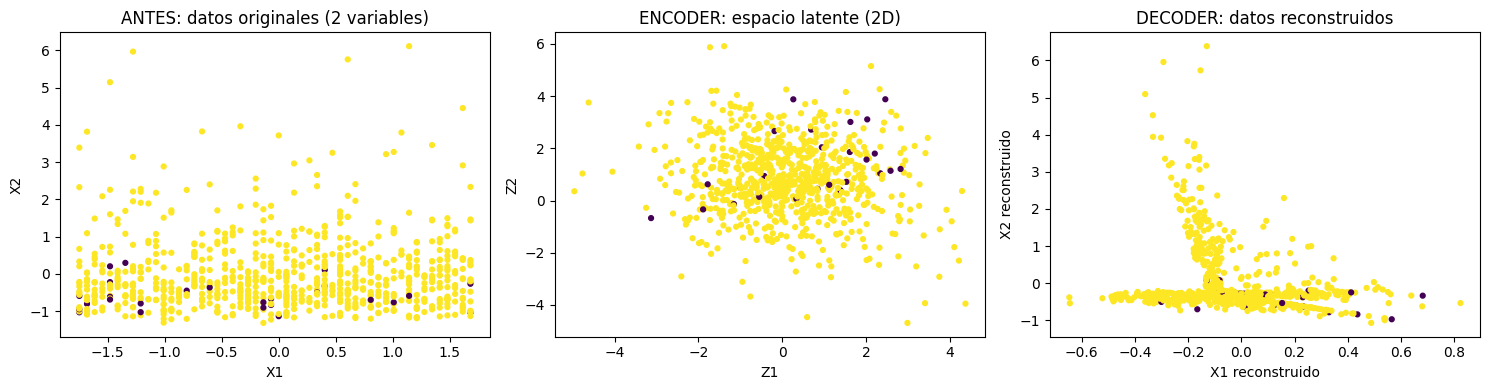

In [45]:
plt.figure(figsize=(15, 4))

# -------------------------------
# 1) ANTES DEL ENCODER (original)
# -------------------------------
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=12)
plt.title("ANTES: datos originales (2 variables)")
plt.xlabel("X1")
plt.ylabel("X2")

# -------------------------------
# 2) DESPUÉS DEL ENCODER (latente)
# -------------------------------
plt.subplot(1, 3, 2)
plt.scatter(Z[:, 0], Z[:, 1], c=y, s=12)
plt.title("ENCODER: espacio latente (2D)")
plt.xlabel("Z1")
plt.ylabel("Z2")

# -------------------------------
# 3) DESPUÉS DEL DECODER (reconstrucción)
# -------------------------------
plt.subplot(1, 3, 3)
plt.scatter(X_recon[:, 0], X_recon[:, 1], c=y, s=12)
plt.title("DECODER: datos reconstruidos")
plt.xlabel("X1 reconstruido")
plt.ylabel("X2 reconstruido")

plt.tight_layout()
plt.show()


<h4>Ejemplo con Pytorch</h4>

Epoch 50/200 - loss: 0.1389
Epoch 100/200 - loss: 0.0823
Epoch 150/200 - loss: 0.0691
Epoch 200/200 - loss: 0.0626


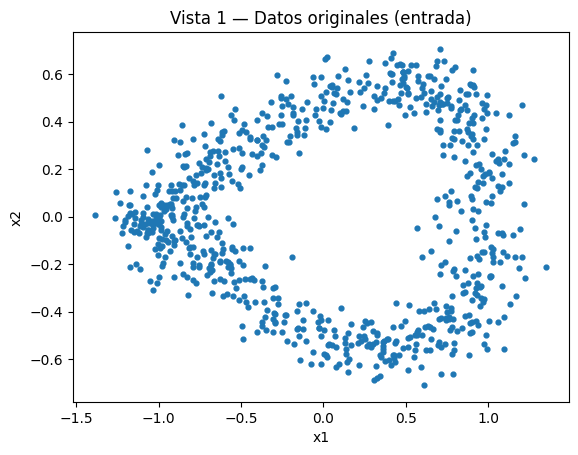

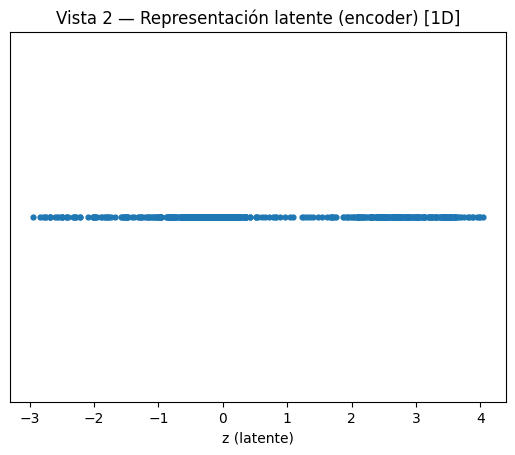

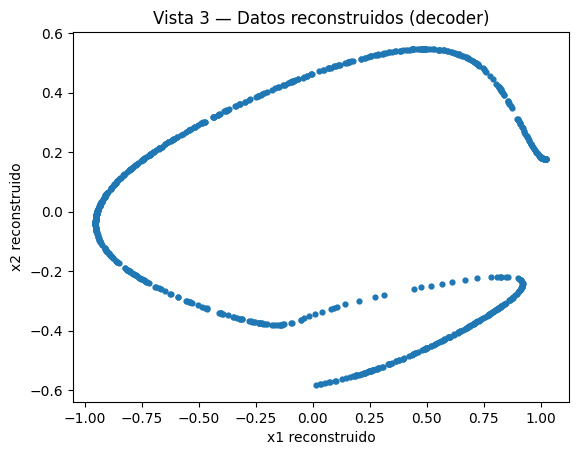

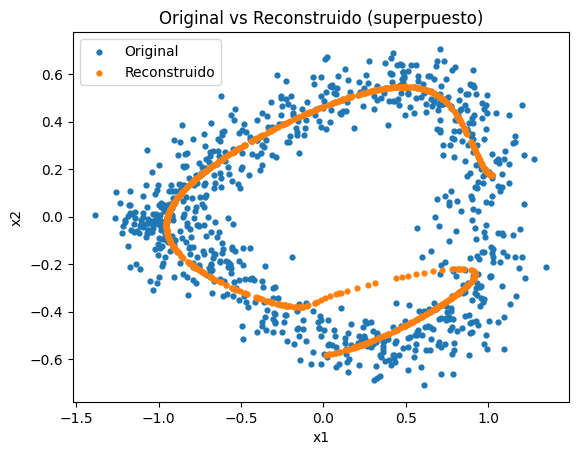

MSE reconstrucción (escala original): 0.022672085091471672


In [47]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# -----------------------------
# 1) Dataset sintético 2D (curva) para visualizar bien
# -----------------------------
np.random.seed(42)
n = 800

t = np.random.rand(n) * 2 * np.pi
r = 1.0 + 0.15 * np.random.randn(n)

x1 = r * np.cos(t)
x2 = 0.5 * r * np.sin(t) + 0.15 * np.sin(2 * t)  # deformación suave
X = np.vstack([x1, x2]).T.astype(np.float32)

# Estandarización simple (muy recomendable para redes)
X_mean = X.mean(axis=0, keepdims=True)
X_std = X.std(axis=0, keepdims=True) + 1e-6
Xn = (X - X_mean) / X_std

Xt = torch.tensor(Xn, dtype=torch.float32)

# DataLoader (mini-batches)
loader = DataLoader(TensorDataset(Xt), batch_size=64, shuffle=True)

# -----------------------------
# 2) Autoencoder (2D -> 1D -> 2D)
# -----------------------------
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder: 2 -> 8 -> 1
        self.encoder = nn.Sequential(
            nn.Linear(2, 8),
            nn.Tanh(),
            nn.Linear(8, 1)
        )
        # Decoder: 1 -> 8 -> 2
        self.decoder = nn.Sequential(
            nn.Linear(1, 8),
            nn.Tanh(),
            nn.Linear(8, 2)
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z

torch.manual_seed(42)
model = AutoEncoder()

opt = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# -----------------------------
# 3) Entrenamiento rápido
# -----------------------------
epochs = 200
model.train()
for epoch in range(epochs):
    total = 0.0
    for (batch,) in loader:
        opt.zero_grad()
        xhat, _ = model(batch)
        loss = loss_fn(xhat, batch)
        loss.backward()
        opt.step()
        total += loss.item() * batch.size(0)

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs} - loss: {total / n:.4f}")

# -----------------------------
# 4) Obtener 3 vistas: entrada, latente, reconstrucción
# -----------------------------
model.eval()
with torch.no_grad():
    Xhat_n, Z = model(Xt)     # reconstrucción (normalizada) y latente
    Xhat_n = Xhat_n.numpy()
    Z = Z.numpy()

# Volver a la escala original
Xrec = (Xhat_n * X_std) + X_mean

# -----------------------------
# 5) Gráficas
# -----------------------------

# Vista 1: Entrada original
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=12)
plt.title("Vista 1 — Datos originales (entrada)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Vista 2: Salida del encoder (latente 1D)
plt.figure()
plt.scatter(Z[:, 0], np.zeros_like(Z[:, 0]), s=12)
plt.title("Vista 2 — Representación latente (encoder) [1D]")
plt.xlabel("z (latente)")
plt.yticks([])
plt.show()

# Vista 3: Salida del decoder (reconstrucción)
plt.figure()
plt.scatter(Xrec[:, 0], Xrec[:, 1], s=12)
plt.title("Vista 3 — Datos reconstruidos (decoder)")
plt.xlabel("x1 reconstruido")
plt.ylabel("x2 reconstruido")
plt.show()

# (Opcional) Comparación superpuesta: original vs reconstruido
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=12, label="Original")
plt.scatter(Xrec[:, 0], Xrec[:, 1], s=12, label="Reconstruido")
plt.title("Original vs Reconstruido (superpuesto)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

# Error de reconstrucción (en escala original)
mse = float(np.mean((X - Xrec) ** 2))
print("MSE reconstrucción (escala original):", mse)


<h4>Ejemplo con Tensorflow</h4>

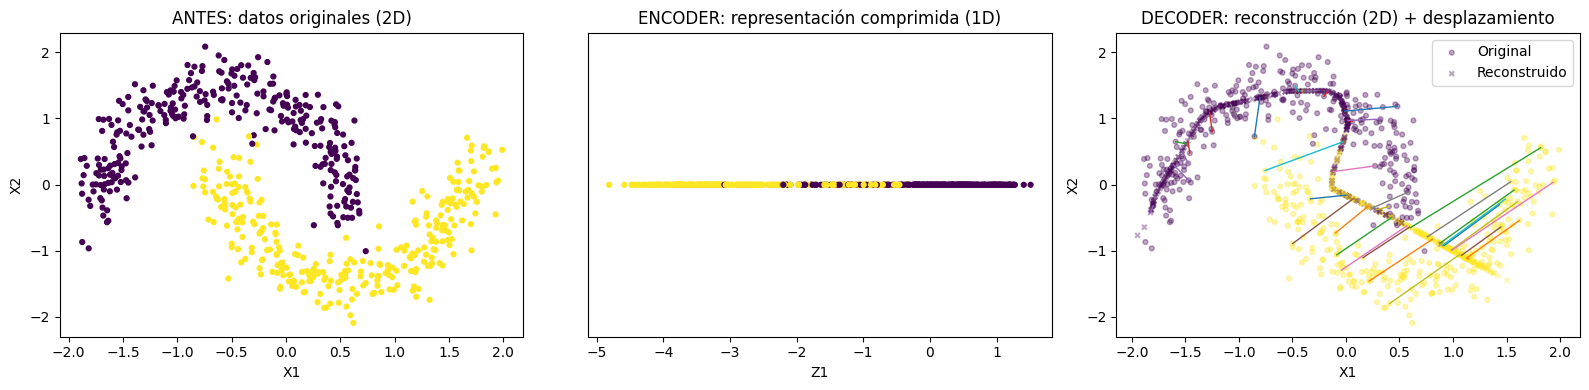

MSE medio de reconstrucción: 0.16974618308548725


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import layers, Model

# -----------------------------
# 1) Dataset 2D "obvio" (moons)
# -----------------------------
np.random.seed(42)
X, y = make_moons(n_samples=600, noise=0.12, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 2) Autoencoder 2D -> 1D -> 2D
# -----------------------------
input_dim = 2
latent_dim = 1  # compresión MUY evidente

inp = layers.Input(shape=(input_dim,))
h = layers.Dense(16, activation="relu")(inp)
h = layers.Dense(8, activation="relu")(h)
z = layers.Dense(latent_dim, name="latent")(h)

h2 = layers.Dense(8, activation="relu")(z)
h2 = layers.Dense(16, activation="relu")(h2)
out = layers.Dense(input_dim)(h2)

autoencoder = Model(inp, out)
encoder = Model(inp, z)

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_scaled, X_scaled, epochs=80, batch_size=32, verbose=0)

Z = encoder.predict(X_scaled, verbose=0)          # 1D
X_recon = autoencoder.predict(X_scaled, verbose=0) # 2D reconstruido

# -----------------------------
# 3) Visualizaciones
# -----------------------------
plt.figure(figsize=(16, 4))

# (A) ANTES: datos originales 2D
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=12)
plt.title("ANTES: datos originales (2D)")
plt.xlabel("X1"); plt.ylabel("X2")

# (B) ENCODER: latente 1D (se ve como una línea)
plt.subplot(1, 3, 2)
plt.scatter(Z[:, 0], np.zeros_like(Z[:, 0]), c=y, s=12)
plt.title("ENCODER: representación comprimida (1D)")
plt.xlabel("Z1"); plt.yticks([])

# (C) DESPUÉS: reconstrucción 2D + flechas
plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=12, alpha=0.35, label="Original")
plt.scatter(X_recon[:, 0], X_recon[:, 1], c=y, s=12, alpha=0.35, marker="x", label="Reconstruido")

# Dibujar flechas (solo algunas muestras para no saturar)
idx = np.random.choice(len(X_scaled), size=35, replace=False)
for i in idx:
    plt.plot([X_scaled[i, 0], X_recon[i, 0]],
             [X_scaled[i, 1], X_recon[i, 1]],
             linewidth=1)

plt.title("DECODER: reconstrucción (2D) + desplazamiento")
plt.xlabel("X1"); plt.ylabel("X2")
plt.legend()

plt.tight_layout()
plt.show()

# Error de reconstrucción
mse = np.mean((X_scaled - X_recon) ** 2)
print("MSE medio de reconstrucción:", mse)


<h2>12. Balanceo de Clases</h2>

<h4>12.2.1 A Nivel de Datos</h4>

<h4>12.2.1.1 Submuestreo (Undersampling)</h4>

Distribución TRAIN original:
 target
0    146248
1      3752
Name: count, dtype: int64


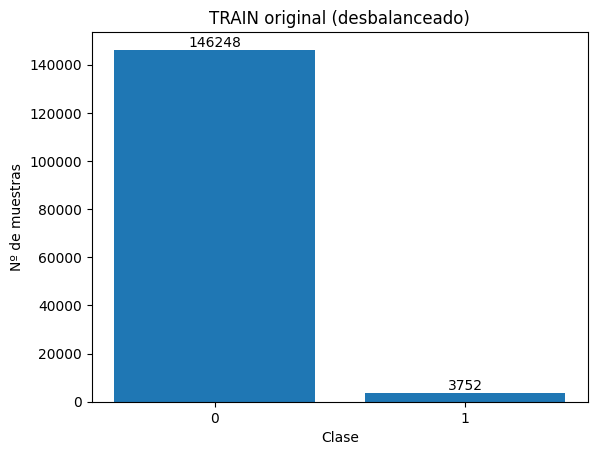


Random Undersampling:
 target
1    3752
0    3752
Name: count, dtype: int64


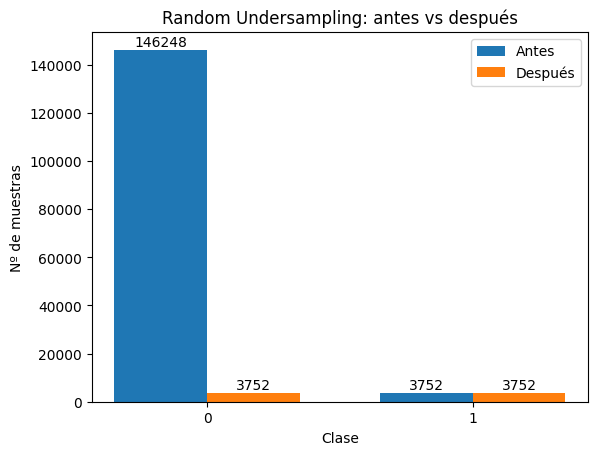


Tomek Links (aprox):
 target
0    142496
1      3752
Name: count, dtype: int64


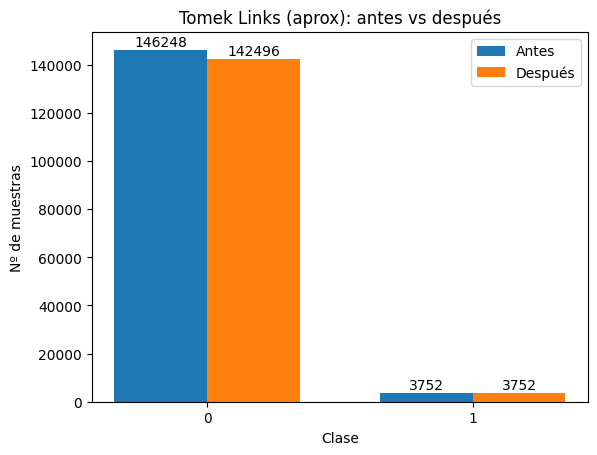


NearMiss (simple):
 target
1    3752
0    3752
Name: count, dtype: int64


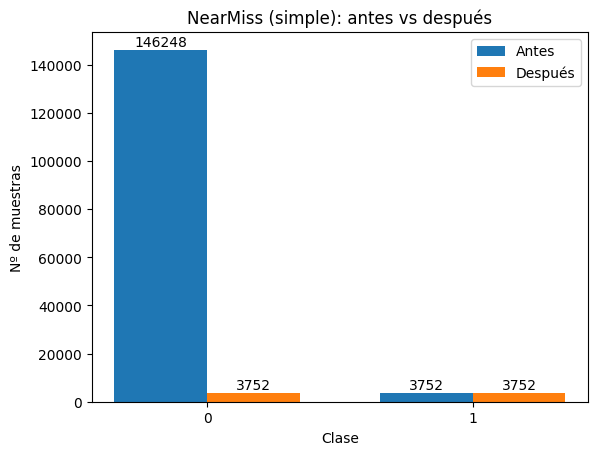


✅ Listo: gráficas de antes/después para las 4 técnicas .


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans


# ============================================================
# 1) CARGA
# ============================================================
RUTA_CSV = "dataset_desbalanceado.csv"
TARGET_COL = "target"

df = pd.read_csv(RUTA_CSV)

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


# ============================================================
# 2) UTILIDADES DE VISUALIZACIÓN
# ============================================================
def plot_distribucion(y_series, titulo):
    counts = y_series.value_counts().sort_index()
    fig, ax = plt.subplots()

    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title(titulo)
    ax.set_xlabel("Clase")
    ax.set_ylabel("Nº de muestras")

    # Etiquetas con números encima
    for i, v in enumerate(counts.values):
        ax.text(i, v, str(v), ha="center", va="bottom")

    plt.show()


def plot_antes_despues(y_antes, y_despues, titulo):
    c1 = y_antes.value_counts().sort_index()
    c2 = y_despues.value_counts().sort_index()

    clases = sorted(set(c1.index).union(set(c2.index)))
    v1 = [int(c1.get(c, 0)) for c in clases]
    v2 = [int(c2.get(c, 0)) for c in clases]

    x = np.arange(len(clases))
    w = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - w/2, v1, width=w, label="Antes")
    ax.bar(x + w/2, v2, width=w, label="Después")

    ax.set_xticks(x)
    ax.set_xticklabels([str(c) for c in clases])
    ax.set_title(titulo)
    ax.set_xlabel("Clase")
    ax.set_ylabel("Nº de muestras")
    ax.legend()

    # Etiquetas numéricas
    for xi, val in zip(x - w/2, v1):
        ax.text(xi, val, str(val), ha="center", va="bottom")
    for xi, val in zip(x + w/2, v2):
        ax.text(xi, val, str(val), ha="center", va="bottom")

    plt.show()


# ============================================================
# 3) DISTRIBUCIÓN INICIAL
# ============================================================
print("Distribución TRAIN original:\n", y_train.value_counts())
plot_distribucion(y_train, "TRAIN original (desbalanceado)")


# ============================================================
# 4) UNDERSAMPLING MANUAL (4 TÉCNICAS) + GRÁFICAS
# ============================================================
df_train = X_train.copy()
df_train[TARGET_COL] = y_train

df_may = df_train[df_train[TARGET_COL] == 0]
df_min = df_train[df_train[TARGET_COL] == 1]
n_min = len(df_min)

y_train_original = df_train[TARGET_COL]


# ------------------------------------------------------------
# 1) RANDOM UNDERSAMPLING
# ------------------------------------------------------------
df_random = pd.concat([
    df_min,
    df_may.sample(n=n_min, random_state=42)
], ignore_index=True)

print("\nRandom Undersampling:\n", df_random[TARGET_COL].value_counts())
plot_antes_despues(y_train_original, df_random[TARGET_COL], "Random Undersampling: antes vs después")


# ------------------------------------------------------------
# 2) TOMEK LINKS (aproximación didáctica)
# Idea: quitar mayoritarios "pegados" a minoritarios.
# Aquí eliminamos los n_min mayoritarios más cercanos a minoritarios
# (no es Tomek exacto, pero visualmente se entiende la idea)
# ------------------------------------------------------------
nn = NearestNeighbors(n_neighbors=1)
nn.fit(df_min.drop(columns=[TARGET_COL]))

distances, _ = nn.kneighbors(df_may.drop(columns=[TARGET_COL]))
orden = np.argsort(distances.flatten())  # más cercanos primero

# Quitamos los n_min más cercanos y nos quedamos con el resto
df_may_tomek_like = df_may.iloc[orden[n_min:]]
df_tomek = pd.concat([df_min, df_may_tomek_like], ignore_index=True)

print("\nTomek Links (aprox):\n", df_tomek[TARGET_COL].value_counts())
plot_antes_despues(y_train_original, df_tomek[TARGET_COL], "Tomek Links (aprox): antes vs después")


# ------------------------------------------------------------
# 3) NEARMISS (simple)
# Idea: quedarnos con mayoritarios MÁS cercanos a minoritarios
# ------------------------------------------------------------
nn = NearestNeighbors(n_neighbors=1)
nn.fit(df_min.drop(columns=[TARGET_COL]))

distances, _ = nn.kneighbors(df_may.drop(columns=[TARGET_COL]))
orden = np.argsort(distances.flatten())  # más cercanos primero

df_may_nearmiss = df_may.iloc[orden[:n_min]]
df_nearmiss = pd.concat([df_min, df_may_nearmiss], ignore_index=True)

print("\nNearMiss (simple):\n", df_nearmiss[TARGET_COL].value_counts())
plot_antes_despues(y_train_original, df_nearmiss[TARGET_COL], "NearMiss (simple): antes vs después")


# ------------------------------------------------------------
# 4) CLUSTER CENTROIDS
# Idea: "resumir" la mayoritaria con centroides (KMeans)
# Nota: puede ser costoso si n_min es muy grande; si tarda,
# baja n_samples o sube imbalance_ratio al generar el CSV.
# ------------------------------------------------------------

# kmeans = KMeans(n_clusters=n_min, random_state=42)
# kmeans.fit(df_may.drop(columns=[TARGET_COL]))

# df_centroids = pd.DataFrame(
#     kmeans.cluster_centers_,
#     columns=df_may.drop(columns=[TARGET_COL]).columns
# )
# df_centroids[TARGET_COL] = 0

# df_cluster = pd.concat([df_min, df_centroids], ignore_index=True)

# print("\nCluster Centroids:\n", df_cluster[TARGET_COL].value_counts())
# plot_antes_despues(y_train_original, df_cluster[TARGET_COL], "Cluster Centroids: antes vs después")


print("\n✅ Listo: gráficas de antes/después para las 4 técnicas .")


<h4>12.2.1.2 Sobremuestreo (Oversampling))</h4>

ANTES: {np.int64(0): 730, np.int64(1): 70}
1) RandomOver: {np.int64(0): 730, np.int64(1): 730}


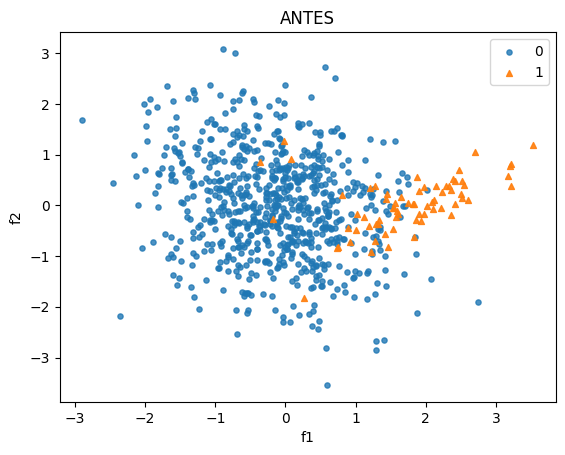

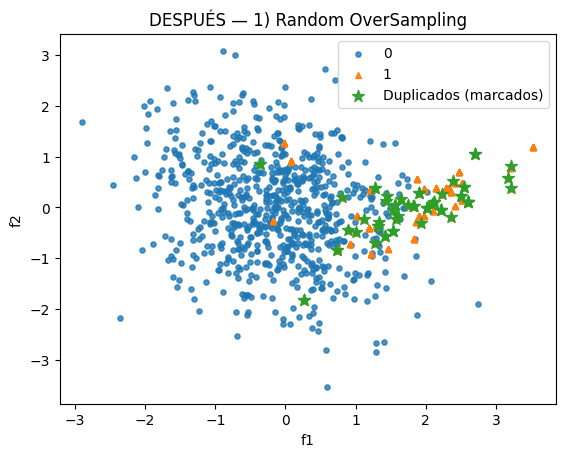

2) SMOTE: {np.int64(0): 730, np.int64(1): 730}


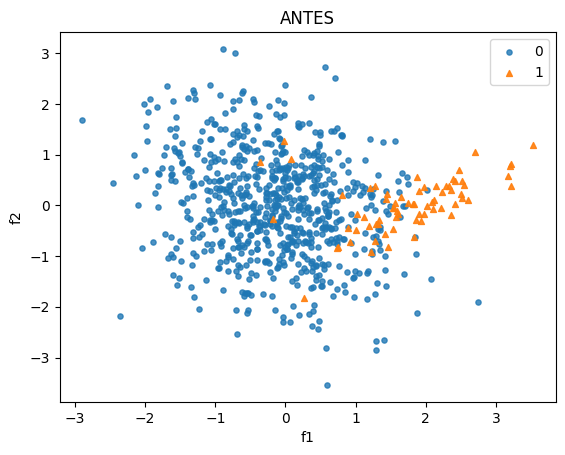

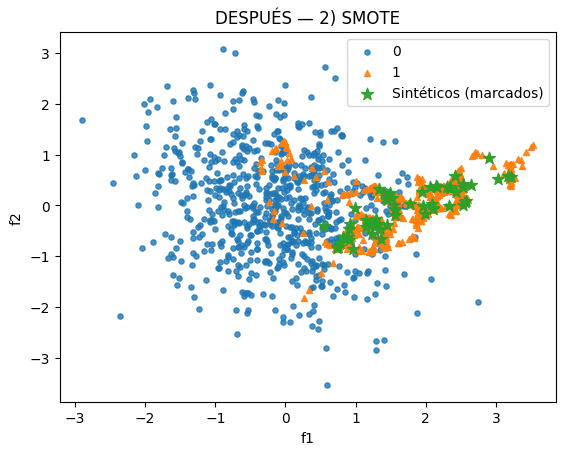

3) Borderline-SMOTE: {np.int64(0): 730, np.int64(1): 730}


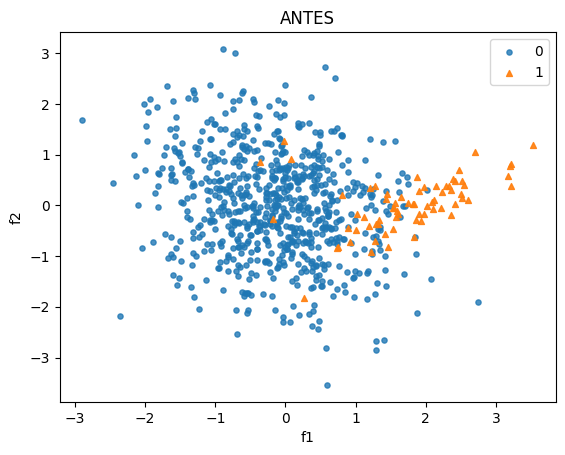

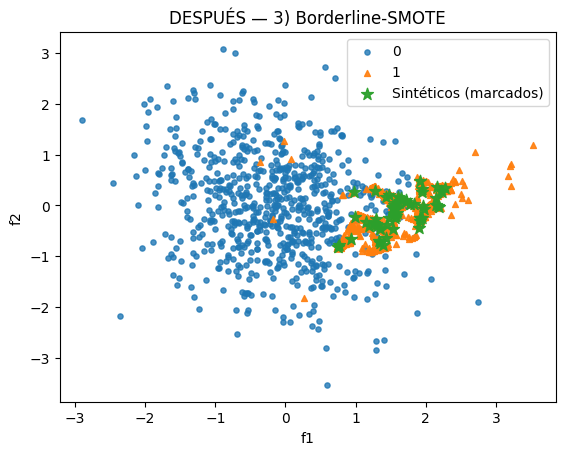

4) ADASYN: {np.int64(0): 730, np.int64(1): 730}


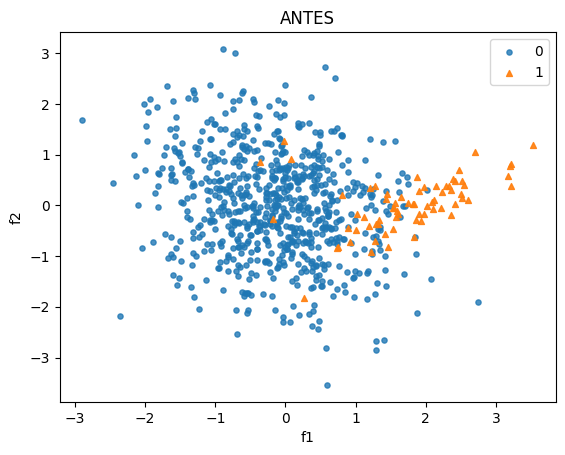

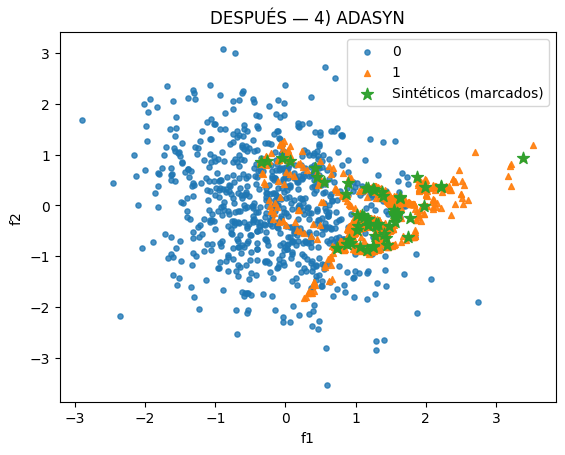

5A) SMOTE+Tomek: {np.int64(0): 705, np.int64(1): 730}


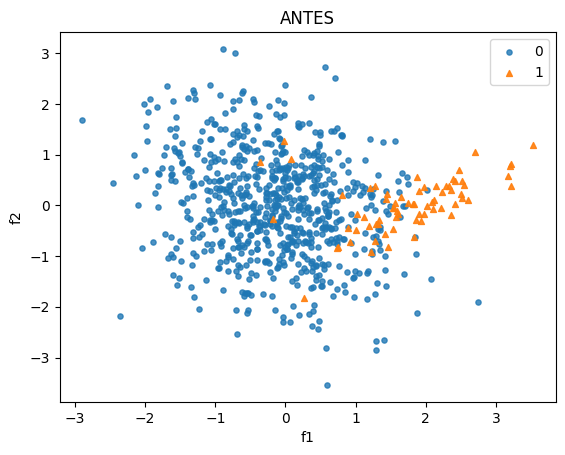

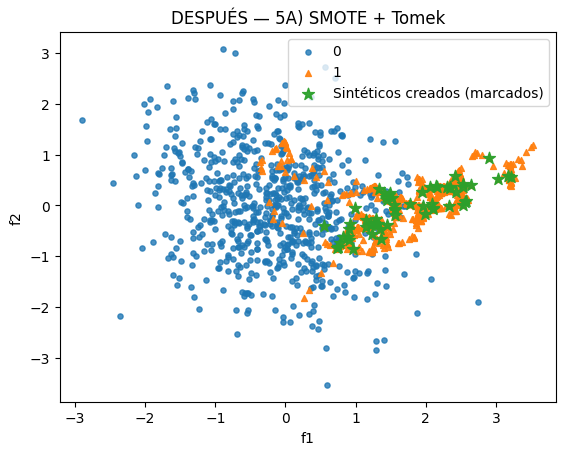

5B) SMOTE+ENN: {np.int64(0): 678, np.int64(1): 690}


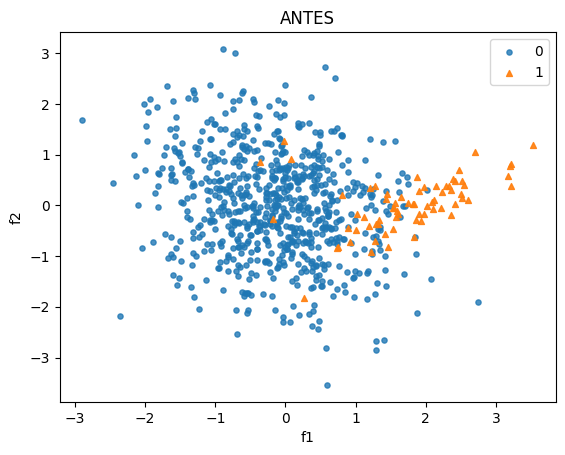

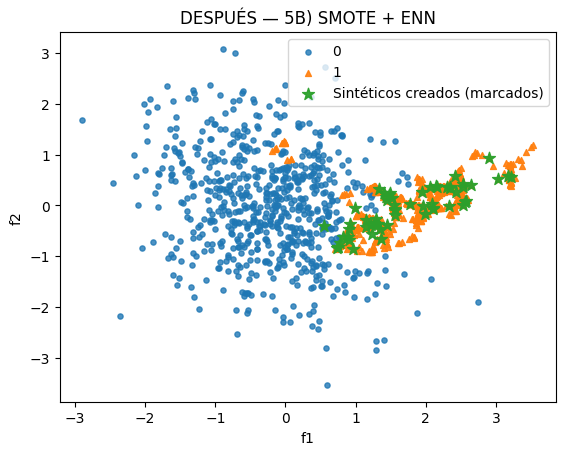

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# -------------------- Datos 2D desbalanceados --------------------
np.random.seed(42)
X, y = make_classification(n_samples=800, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, weights=[0.92, 0.08], class_sep=1.2, random_state=42)
X = StandardScaler().fit_transform(X)

def counts(y): return {c: int((y==c).sum()) for c in np.unique(y)}

def plot(Xb,yb,Xa,ya,title,hi=None,hi_lab="Nuevos (marcados)"):
    plt.figure(); plt.scatter(Xb[yb==0,0],Xb[yb==0,1],s=14,marker="o",alpha=.8,label="0")
    plt.scatter(Xb[yb==1,0],Xb[yb==1,1],s=18,marker="^",alpha=.9,label="1")
    plt.title("ANTES"); plt.xlabel("f1"); plt.ylabel("f2"); plt.legend(); plt.show()
    plt.figure(); plt.scatter(Xa[ya==0,0],Xa[ya==0,1],s=14,marker="o",alpha=.8,label="0")
    plt.scatter(Xa[ya==1,0],Xa[ya==1,1],s=18,marker="^",alpha=.9,label="1")
    if hi is not None and len(hi): plt.scatter(hi[:,0],hi[:,1],s=80,marker="*",alpha=.95,label=hi_lab)
    plt.title("DESPUÉS — "+title); plt.xlabel("f1"); plt.ylabel("f2"); plt.legend(); plt.show()

def pick(P,k=60,seed=42):
    if P is None or len(P)==0: return np.empty((0,2))
    rng=np.random.default_rng(seed); return P[rng.choice(len(P), size=min(k,len(P)), replace=False)]

# -------------------- 1) Random OverSampling (duplica) --------------------
def random_over(X,y,minor=1,seed=42):
    rng=np.random.default_rng(seed); Xm=X[y==minor]; Xj=X[y!=minor]
    nadd=len(Xj)-len(Xm)
    if nadd<=0: return X,y,np.empty((0,2))
    dup = Xm[rng.integers(0,len(Xm),size=nadd)]
    return np.vstack([X,dup]), np.hstack([y, np.full(nadd,minor)]), dup

# -------------------- 2) SMOTE (interpola vecinos minoritarios) --------------------
def smote(X,y,minor=1,k=5,seed=42,only_idxs=None):
    rng=np.random.default_rng(seed); Xm=X[y==minor]; Xj=X[y!=minor]
    nadd=len(Xj)-len(Xm)
    if nadd<=0: return X,y,np.empty((0,2))
    nn=NearestNeighbors(n_neighbors=k+1).fit(Xm)
    nb=nn.kneighbors(Xm,return_distance=False)[:,1:]
    idx_pool = np.arange(len(Xm)) if only_idxs is None else np.array(only_idxs)
    syn=[]
    for _ in range(nadd):
        i=rng.choice(idx_pool); j=rng.choice(nb[i]); a=rng.random()
        syn.append(Xm[i]+a*(Xm[j]-Xm[i]))
    syn=np.array(syn); return np.vstack([X,syn]), np.hstack([y,np.full(len(syn),minor)]), syn

# -------------------- 3) Borderline-SMOTE (solo "danger") --------------------
def borderline_smote(X,y,minor=1,k=5,m=10,seed=42):
    Xm=X[y==minor]
    nn_all=NearestNeighbors(n_neighbors=m+1).fit(X)
    nb_all=nn_all.kneighbors(Xm,return_distance=False)[:,1:]
    maj_cnt=np.array([(y[idx]!=minor).sum() for idx in nb_all])
    danger=np.where((maj_cnt>=1)&(maj_cnt<=m-1))[0]
    if len(danger)==0: return smote(X,y,minor,k,seed)
    return smote(X,y,minor,k,seed,only_idxs=danger)

# -------------------- 4) ADASYN (más sintéticos donde es más difícil) --------------------
def adasyn(X,y,minor=1,k=5,seed=42):
    rng=np.random.default_rng(seed); Xm=X[y==minor]; Xj=X[y!=minor]
    nadd=len(Xj)-len(Xm)
    if nadd<=0: return X,y,np.empty((0,2))
    nn_all=NearestNeighbors(n_neighbors=k+1).fit(X)
    nb_all=nn_all.kneighbors(Xm,return_distance=False)[:,1:]
    r=np.array([(y[idx]!=minor).sum()/k for idx in nb_all],dtype=float)
    if r.sum()==0: return smote(X,y,minor,k,seed)
    g=r/r.sum(); n=np.floor(g*nadd).astype(int)
    diff=nadd-n.sum()
    if diff>0:
        for i in rng.choice(len(n),size=diff,replace=True): n[i]+=1
    nn=NearestNeighbors(n_neighbors=k+1).fit(Xm)
    nb=nn.kneighbors(Xm,return_distance=False)[:,1:]
    syn=[]
    for i,ni in enumerate(n):
        for _ in range(ni):
            j=rng.choice(nb[i]); a=rng.random()
            syn.append(Xm[i]+a*(Xm[j]-Xm[i]))
    syn=np.array(syn); return np.vstack([X,syn]), np.hstack([y,np.full(len(syn),minor)]), syn

# -------------------- Limpieza: Tomek y ENN --------------------
def tomek(X,y,minor=1):
    nn=NearestNeighbors(n_neighbors=2).fit(X)
    n1=nn.kneighbors(X,return_distance=False)[:,1]
    rm=np.zeros(len(X),dtype=bool)
    for i in range(len(X)):
        j=n1[i]
        if y[i]!=y[j] and n1[j]==i:
            rm[i]= (y[i]!=minor)
            rm[j]= rm[j] or (y[j]!=minor)
    return X[~rm], y[~rm]

def enn(X,y,k=3):
    nn=NearestNeighbors(n_neighbors=k+1).fit(X)
    nb=nn.kneighbors(X,return_distance=False)[:,1:]
    rm=np.array([np.bincount(y[nb[i]]).argmax()!=y[i] for i in range(len(X))])
    return X[~rm], y[~rm]

# -------------------- Ejecutar 5 casos --------------------
print("ANTES:", counts(y))

# 1) RandomOver
X1,y1,dup = random_over(X,y,1,42)
print("1) RandomOver:", counts(y1))
plot(X,y,X1,y1,"1) Random OverSampling",hi=pick(dup),hi_lab="Duplicados (marcados)")

# 2) SMOTE
X2,y2,syn2 = smote(X,y,1,5,42)
print("2) SMOTE:", counts(y2))
plot(X,y,X2,y2,"2) SMOTE",hi=pick(syn2),hi_lab="Sintéticos (marcados)")

# 3) Borderline-SMOTE
X3,y3,syn3 = borderline_smote(X,y,1,5,10,42)
print("3) Borderline-SMOTE:", counts(y3))
plot(X,y,X3,y3,"3) Borderline-SMOTE",hi=pick(syn3),hi_lab="Sintéticos (marcados)")

# 4) ADASYN
X4,y4,syn4 = adasyn(X,y,1,5,42)
print("4) ADASYN:", counts(y4))
plot(X,y,X4,y4,"4) ADASYN",hi=pick(syn4),hi_lab="Sintéticos (marcados)")

# 5) SMOTE + Limpieza (Tomek y ENN)
X5a,y5a,syn5a = smote(X,y,1,5,42); X5a,y5a = tomek(X5a,y5a,1)
print("5A) SMOTE+Tomek:", counts(y5a))
plot(X,y,X5a,y5a,"5A) SMOTE + Tomek",hi=pick(syn5a),hi_lab="Sintéticos creados (marcados)")

X5b,y5b,syn5b = smote(X,y,1,5,42); X5b,y5b = enn(X5b,y5b,3)
print("5B) SMOTE+ENN:", counts(y5b))
plot(X,y,X5b,y5b,"5B) SMOTE + ENN",hi=pick(syn5b),hi_lab="Sintéticos creados (marcados)")


In [ ]:
<h4>10.2.2.4. RFECV (Recursive Feature Elimination with Cross-Validation)</h4>

In [ ]:
<h4>10.2.2.4. RFECV (Recursive Feature Elimination with Cross-Validation)</h4>

<h4>12.2.2 A Nivel de Algoritmos</h4>

<h4>12.2.2.1 class_weight Opción class_weight="balanced"</h4>

0) Cargar datos y preparar train/test

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset
df = pd.read_csv("dataset_desbalanceado.csv")

# Ajusta si tu columna objetivo tiene otro nombre
X = df.drop(columns=["target"])
y = df["target"]

# Split estratificado (importante en desbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Escalado (recomendado para modelos lineales y SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


1) Baseline: sin class_weight

Esperable: buena accuracy, mal recall en la clase minoritaria.

In [7]:
from sklearn.linear_model import LogisticRegression

lr_base = LogisticRegression(max_iter=1000, random_state=42)
lr_base.fit(X_train_scaled, y_train)

y_pred_base = lr_base.predict(X_test_scaled)

print("=== Baseline (sin class_weight) ===")
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))


=== Baseline (sin class_weight) ===
[[38988    12]
 [  813   187]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     39000
           1       0.94      0.19      0.31      1000

    accuracy                           0.98     40000
   macro avg       0.96      0.59      0.65     40000
weighted avg       0.98      0.98      0.97     40000



2) class_weight="balanced" (automático)

Esperable: sube el recall de la minoritaria, puede bajar precision/accuracy.

In [8]:
lr_bal = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr_bal.fit(X_train_scaled, y_train)

y_pred_bal = lr_bal.predict(X_test_scaled)

print("=== LogisticRegression con class_weight='balanced' ===")
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))


=== LogisticRegression con class_weight='balanced' ===
[[30410  8590]
 [  271   729]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     39000
           1       0.08      0.73      0.14      1000

    accuracy                           0.78     40000
   macro avg       0.53      0.75      0.51     40000
weighted avg       0.97      0.78      0.85     40000



3) class_weight manual (tú decides la proporción)

In [9]:
# Ejemplo: dar 5 veces más peso a la clase 1
weights = {0: 1, 1: 5}

lr_manual = LogisticRegression(class_weight=weights, max_iter=1000, random_state=42)
lr_manual.fit(X_train_scaled, y_train)

y_pred_manual = lr_manual.predict(X_test_scaled)

print("=== LogisticRegression con class_weight manual ===")
print("Pesos:", weights)
print(confusion_matrix(y_test, y_pred_manual))
print(classification_report(y_test, y_pred_manual))


=== LogisticRegression con class_weight manual ===
Pesos: {0: 1, 1: 5}
[[38687   313]
 [  647   353]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     39000
           1       0.53      0.35      0.42      1000

    accuracy                           0.98     40000
   macro avg       0.76      0.67      0.71     40000
weighted avg       0.97      0.98      0.97     40000



<h4>12.2.3 A Nivel de Modelos</h4>

1) Imports y carga de datos

In [15]:
#Muchas técnicas de balanceo avanzadas (SMOTE, Balanced RF, etc.) están ahí
#!pip install imbalanced-learn

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Cargar dataset
df = pd.read_csv("dataset_desbalanceado.csv")

# Ajusta si tu target tiene otro nombre
X = df.drop(columns=["target"])
y = df["target"]

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Distribución en train:")
print(y_train.value_counts(normalize=True))


Distribución en train:
target
0    0.974988
1    0.025013
Name: proportion, dtype: float64


<h4>12.2.3.1 Balanced Random Forest</h4>

2) Random Forest NORMAL (sin balancear)

In [17]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest SIN balancear ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



=== Random Forest SIN balancear ===
[[38998     2]
 [  647   353]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     39000
           1       0.99      0.35      0.52      1000

    accuracy                           0.98     40000
   macro avg       0.99      0.68      0.76     40000
weighted avg       0.98      0.98      0.98     40000



3) Balanced Random Forest (con balanceo interno)

In [18]:
brf = BalancedRandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)

print("\n=== Balanced Random Forest (con balanceo) ===")
print(confusion_matrix(y_test, y_pred_brf))
print(classification_report(y_test, y_pred_brf))



=== Balanced Random Forest (con balanceo) ===
[[37765  1235]
 [  238   762]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     39000
           1       0.38      0.76      0.51      1000

    accuracy                           0.96     40000
   macro avg       0.69      0.87      0.74     40000
weighted avg       0.98      0.96      0.97     40000



## 🧠 4) Qué deberías observar
Normalmente verás algo así:
### 🌳 Random Forest normal
- ✔️ Accuracy alta  
- ❌ Recall muy bajo en la clase minoritaria  
### ⚖️ Balanced Random Forest
- ✔️ Recall de la minoritaria mucho mejor  
- ❌ Puede bajar la accuracy o la precision de la minoritaria  


<h4>12.2.3.2 EasyEnsemble</h4>

In [20]:
from imblearn.ensemble import EasyEnsembleClassifier

# Crear modelo EasyEnsemble
# n_estimators = número de modelos que se entrenan con distintos undersamplings
ee = EasyEnsembleClassifier(
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# Entrenar
ee.fit(X_train, y_train)

# Predecir
y_pred = ee.predict(X_test)

# Evaluar
print("\n=== EasyEnsemble ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== EasyEnsemble ===
[[29221  9779]
 [  261   739]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     39000
           1       0.07      0.74      0.13      1000

    accuracy                           0.75     40000
   macro avg       0.53      0.74      0.49     40000
weighted avg       0.97      0.75      0.84     40000



## 🧠 Qué deberías observar

Normalmente verás algo así:

### 🧩 EasyEnsemble
- ✔️ Mejora clara del **recall** de la clase minoritaria  
- ✔️ Suele mejorar también el **F1-score** de la minoritaria  
- ❌ Puede bajar la **accuracy** global  
- ❌ La **precision** de la minoritaria puede disminuir (más falsos positivos)  

En general, EasyEnsemble:
- Se centra en los **casos difíciles** cerca de la frontera  
- Prioriza no perder ejemplos de la clase minoritaria  
- Sacrifica algo de rendimiento en la clase mayoritaria


<h4>12.2.3.3 RUSBoost</h4>

In [21]:
from imblearn.ensemble import RUSBoostClassifier


# Crear modelo RUSBoost
# n_estimators = número de iteraciones de boosting (número de clasificadores débiles)
rusboost = RUSBoostClassifier(
    n_estimators=100,
    random_state=42
)

# Entrenar
rusboost.fit(X_train, y_train)

# Predecir
y_pred = rusboost.predict(X_test)

# Evaluar
print("\n=== RUSBoost ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== RUSBoost ===
[[33393  5607]
 [  715   285]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     39000
           1       0.05      0.28      0.08      1000

    accuracy                           0.84     40000
   macro avg       0.51      0.57      0.50     40000
weighted avg       0.96      0.84      0.89     40000



## 🧠  Qué deberías observar

### 🚀 RUSBoost
- ✔️ Mejora notable del **recall** de la clase minoritaria  
- ✔️ Suele mejorar el **F1-score** de la minoritaria  
- ❌ Puede bajar la **accuracy** global  
- ❌ Puede ser más **sensible al ruido** que otros métodos  
